# UAS SAINS DATA CONSULTING

**Kelompok 2 (Case AXA: Recommender System for Insurance Products)**
1. Bela Sonia (164221004)
2. Adi Jalu Pratomo	(164221049)
3. Aura Najma Kustiananda (164221053)
4. Jovita Suryo Angeline (164221094)
5. Kania Putri Octavia (164221111)

## LIBRARY DAN IMPOR DATA

In [6]:
# 📊 Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 Preprocessing dan Transformasi Fitur
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# 🧠 Modeling dan Algoritma Machine Learning
# — Klasifikasi dan Regresi
from sklearn.ensemble import RandomForestRegressor

# — Clustering
from sklearn.cluster import KMeans

# — Neighbor-based Learning
from sklearn.neighbors import NearestNeighbors

# 🧪 Evaluasi Model
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

# 🔁 Training dan Validasi
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split

# 🔧 Utility / Tools
import numpy as np
import pandas as pd
import joblib
import umap


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_excel('Insurance Data.xlsx')
df.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,...,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,...,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,NaN,...,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,...,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,...,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,...,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B


## EKSPLORASI DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        142500 non-null  object        
 6   Education Level                     142500 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     142500 non-null  object        
 10  Purchase

### CEK OUTLIER


No significant outliers detected in 'Age' using IQR method.

No significant outliers detected in 'Interactions with Customer Service' using IQR method.

No significant outliers detected in 'Coverage Amount' using IQR method.

No significant outliers detected in 'Premium Amount' using IQR method.

No significant outliers detected in 'Deductible' using IQR method.

No significant outliers detected in 'Credit Score' using IQR method.


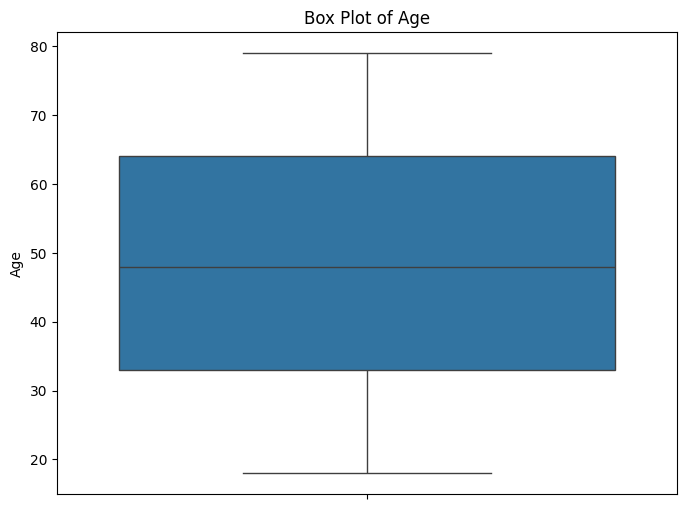

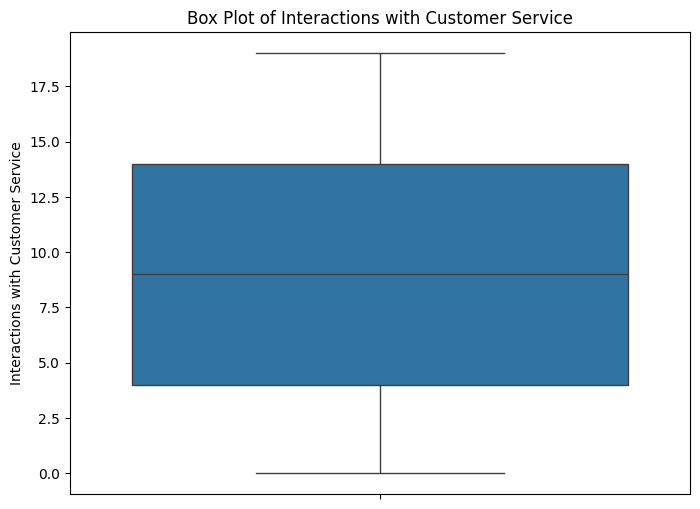

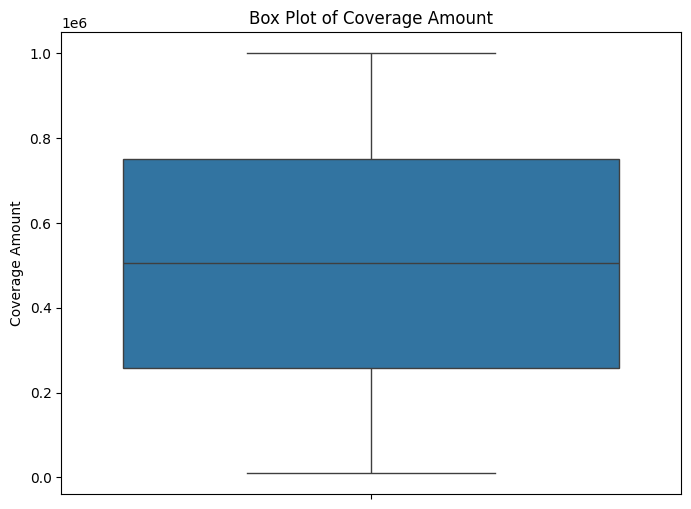

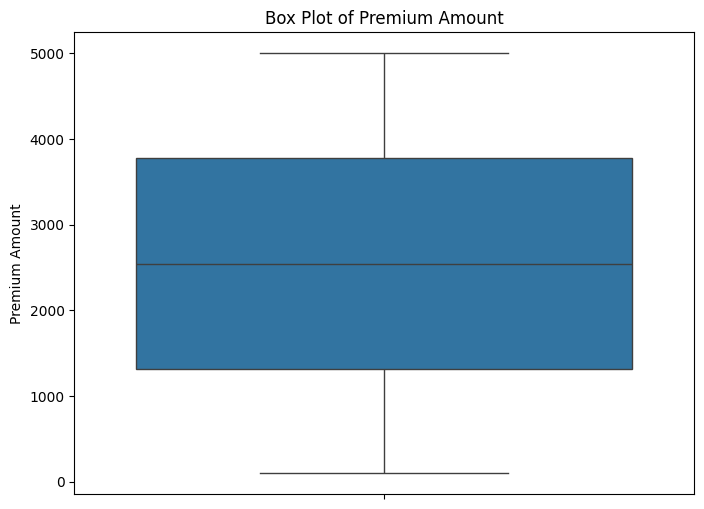

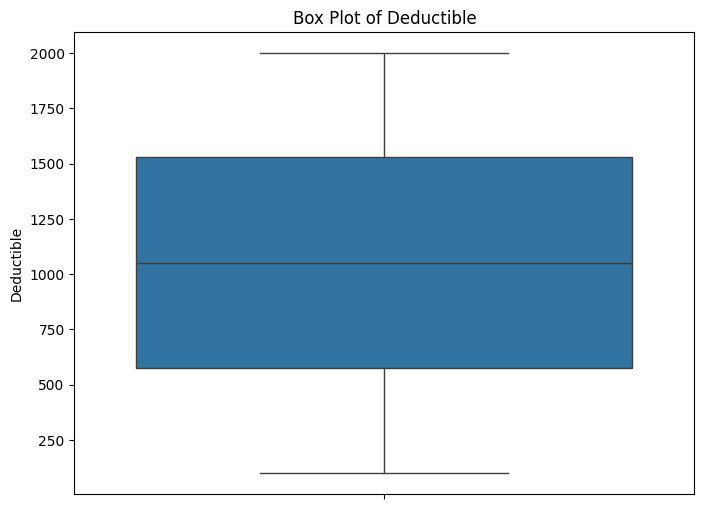

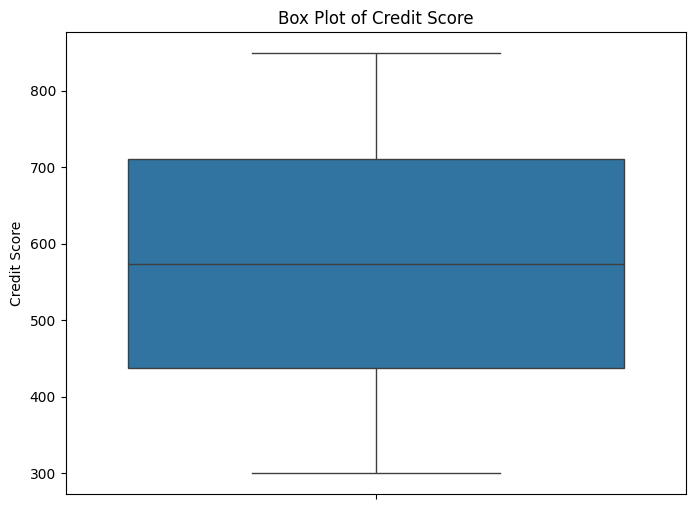

In [6]:
import matplotlib.pyplot as plt
def detect_outliers_iqr(df, column):
  """
    Detects outliers in a non-categorical column using the Interquartile Range (IQR) method.

    Args:
      df: pandas DataFrame.
      column: The name of the non-categorical column to check for outliers.

    Returns:
      A DataFrame containing the outlier values and their indices.
    """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers[['Customer ID', column]]

non_categorical_columns = ['Age', 'Interactions with Customer Service', 'Coverage Amount', 'Premium Amount', 'Deductible', 'Credit Score']

for col in non_categorical_columns:
  outliers_df = detect_outliers_iqr(df, col)
  if not outliers_df.empty:
    print(f"\nOutliers detected in '{col}':")
    print(outliers_df)
  else:
    print(f"\nNo significant outliers detected in '{col}' using IQR method.")

for col in non_categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

### HANDLING MISSING VALUES

In [7]:
df_prepro = df.copy()

In [8]:
missing_info_prepro = df_prepro.isnull().sum()
missing_info_prepro = missing_info_prepro[missing_info_prepro > 0]

if not missing_info_prepro.empty:
  missing_percentage_prepro = (missing_info_prepro / len(df_prepro)) * 100
  missing_count_prepro = missing_info_prepro
  missing_summary_prepro = pd.DataFrame({
      'Missing Count': missing_count_prepro,
      'Missing Percentage': missing_percentage_prepro
  })
  print("Missing Values Information (df_prepro):")
  print(missing_summary_prepro)
else:
  print("No missing values found in df_prepro.")

Missing Values Information (df_prepro):
                 Missing Count  Missing Percentage
Income Level              7500            5.000000
Education Level           7500            5.000000
Behavioral Data           7500            5.000000
Claim History             7500            5.000000
Risk Profile              7500            5.000000
Life Events              25166           16.777333


In [ ]:

cols_with_missing = missing_percentage[missing_percentage > 0].index.tolist()
df_with_missing_cols = df_prepro[cols_with_missing]

cols_without_missing = missing_percentage[missing_percentage == 0].index.tolist()
df_without_missing_cols = df_prepro[cols_without_missing]

print("\nDataFrame dengan kolom yang memiliki missing values:")
df_with_missing_cols.head()




DataFrame dengan kolom yang memiliki missing values:


,Income Level,Education Level,Behavioral Data,Claim History,Risk Profile,Life Events
0,Medium,High School,Inactive,3+ Claims,Low,Retirement
1,Medium,Master,NaN,No Claims,Low,Divorce
2,Low,High School,Occasional,No Claims,Medium,Divorce
3,High,Bachelor,Active,No Claims,Low,Marriage
4,Medium,PhD,Active,1-2 Claims,Low,Childbirth


In [10]:
print("\nDataFrame dengan kolom yang tidak memiliki missing values:")
df_without_missing_cols.head()


DataFrame dengan kolom yang tidak memiliki missing values:


""
0
1
2
3
4


In [11]:
print("\n▶ Imputing Life Events as 'No Event' + creating flag...")

# Hitung jumlah missing sebelum isi
count_life = df_prepro["Life Events"].isna().sum()

# Buat flag sebelum mengisi
df_prepro["LifeEvent_Missing"] = df_prepro["Life Events"].isna().astype(int)

# Imputasi missing value
df_prepro["Life Events"].fillna("No Event", inplace=True)

print(f" → Isi {count_life} baris Life Events dengan 'No Event' dan tandai dengan flag 'LifeEvent_Missing'")



▶ Imputing Life Events as 'No Event' + creating flag...
 → Isi 25166 baris Life Events dengan 'No Event' dan tandai dengan flag 'LifeEvent_Missing'


C:\Users\Acer\AppData\Local\Temp\ipykernel_26464\3709351294.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro["Life Events"].fillna("No Event", inplace=True)


In [12]:
print("\n▶ Imputing Claim History berdasarkan Previous Claims History:")

# 0 klaim sebelumnya → No Claims
count_0 = df_prepro[(df_prepro["Claim History"].isna()) & (df_prepro["Previous Claims History"] == 0)].shape[0]
df_prepro.loc[
    (df_prepro["Claim History"].isna()) & (df_prepro["Previous Claims History"] == 0),
    "Claim History"
] = "No Claims"
print(f" → Previous Claims = 0: isi 'No Claims' untuk {count_0} baris")

# 1–2 klaim sebelumnya → 1-2 Claims
count_12 = df_prepro[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"].isin([1, 2]))
].shape[0]
df_prepro.loc[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"].isin([1, 2])),
    "Claim History"
] = "1-2 Claims"
print(f" → Previous Claims = 1 or 2: isi '1-2 Claims' untuk {count_12} baris")

# 3+ klaim sebelumnya → 3+ Claims (anggap >=3)
count_3plus = df_prepro[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"] >= 3)
].shape[0]
df_prepro.loc[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"] >= 3),
    "Claim History"
] = "3+ Claims"
print(f" → Previous Claims >= 3: isi '3+ Claims' untuk {count_3plus} baris")


▶ Imputing Claim History berdasarkan Previous Claims History:
 → Previous Claims = 0: isi 'No Claims' untuk 1541 baris
 → Previous Claims = 1 or 2: isi '1-2 Claims' untuk 2890 baris
 → Previous Claims >= 3: isi '3+ Claims' untuk 3069 baris


In [13]:
print("\n▶ Imputing Behavioral Data as 'Unknown'...")
count = df_prepro["Behavioral Data"].isna().sum()
df_prepro["Behavioral Data"].fillna("Unknown", inplace=True)
print(f" → Isi {count} baris dengan 'Unknown'")


▶ Imputing Behavioral Data as 'Unknown'...
 → Isi 7500 baris dengan 'Unknown'


C:\Users\Acer\AppData\Local\Temp\ipykernel_26464\2041690831.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro["Behavioral Data"].fillna("Unknown", inplace=True)


In [14]:

missing_info_prepro_after = df_prepro.isnull().sum()
missing_info_prepro_after = missing_info_prepro_after[missing_info_prepro_after > 0]

if not missing_info_prepro_after.empty:
  missing_percentage_prepro_after = (missing_info_prepro_after / len(df_prepro)) * 100
  missing_count_prepro_after = missing_info_prepro_after
  missing_summary_prepro_after = pd.DataFrame({
      'Missing Count': missing_count_prepro_after,
      'Missing Percentage': missing_percentage_prepro_after
  })
  print("Missing Values Information (df_prepro) After Imputation:")
  print(missing_summary_prepro_after)
else:
  print("No missing values found in df_prepro after imputation.")

Missing Values Information (df_prepro) After Imputation:
                 Missing Count  Missing Percentage
Income Level              7500                 5.0
Education Level           7500                 5.0
Risk Profile              7500                 5.0


In [15]:
print("\n▶ Imputasi Income Level berdasarkan kombinasi Education Level + Occupation:")

# Imputasi kombinasi Education Level + Occupation
for edu in df_prepro["Education Level"].dropna().unique():
    for occ in df_prepro["Occupation"].dropna().unique():
        mask_all = (df_prepro["Education Level"] == edu) & (df_prepro["Occupation"] == occ)
        mask_missing = mask_all & df_prepro["Income Level"].isna()
        mode_val = df_prepro[mask_all]["Income Level"].mode()

        if not mode_val.empty:
            count = mask_missing.sum()
            df_prepro.loc[mask_missing, "Income Level"] = mode_val[0]
            if count > 0:
                print(f" → Edu='{edu}', Occ='{occ}' → isi Income Level='{mode_val[0]}' untuk {count} baris")

# Imputasi fallback jika Education Level kosong → hanya berdasarkan Occupation
print("\n▶ Fallback imputasi Income Level berdasarkan Occupation saja (jika Education Level kosong):")

for occ in df_prepro["Occupation"].dropna().unique():
    mask_all = (df_prepro["Occupation"] == occ) & (df_prepro["Education Level"].isna())
    mask_missing = mask_all & df_prepro["Income Level"].isna()
    mode_val = df_prepro[mask_all]["Income Level"].mode()

    if not mode_val.empty:
        count = mask_missing.sum()
        df_prepro.loc[mask_missing, "Income Level"] = mode_val[0]
        if count > 0:
            print(f" → Occ='{occ}' (Edu kosong) → isi Income Level='{mode_val[0]}' untuk {count} baris")



▶ Imputasi Income Level berdasarkan kombinasi Education Level + Occupation:
 → Edu='High School', Occ='Student' → isi Income Level='Medium' untuk 228 baris
 → Edu='High School', Occ='Retired' → isi Income Level='Medium' untuk 215 baris
 → Edu='High School', Occ='Business Owner' → isi Income Level='Medium' untuk 240 baris
 → Edu='High School', Occ='Teacher' → isi Income Level='Medium' untuk 204 baris
 → Edu='High School', Occ='Engineer' → isi Income Level='Medium' untuk 210 baris
 → Edu='High School', Occ='Unemployed' → isi Income Level='Medium' untuk 240 baris
 → Edu='High School', Occ='Lawyer' → isi Income Level='Medium' untuk 210 baris
 → Edu='High School', Occ='Doctor' → isi Income Level='Medium' untuk 205 baris
 → Edu='Master', Occ='Student' → isi Income Level='Medium' untuk 212 baris
 → Edu='Master', Occ='Retired' → isi Income Level='Medium' untuk 227 baris
 → Edu='Master', Occ='Business Owner' → isi Income Level='Medium' untuk 216 baris
 → Edu='Master', Occ='Teacher' → isi Incom

In [16]:
print("\n▶ Imputing Education Level berdasarkan Occupation:")

for occ in df_prepro["Occupation"].dropna().unique():
    mode_edu = df_prepro[df_prepro["Occupation"] == occ]["Education Level"].mode()
    if not mode_edu.empty:
        count = df_prepro[(df_prepro["Education Level"].isna()) & (df_prepro["Occupation"] == occ)].shape[0]
        df_prepro.loc[
            (df_prepro["Education Level"].isna()) & (df_prepro["Occupation"] == occ),
            "Education Level"
        ] = mode_edu[0]
        if count > 0:
            print(f" → Occupation = '{occ}': isi Education Level dengan '{mode_edu[0]}' untuk {count} entri")



▶ Imputing Education Level berdasarkan Occupation:
 → Occupation = 'Student': isi Education Level dengan 'High School' untuk 912 entri
 → Occupation = 'Retired': isi Education Level dengan 'Master' untuk 955 entri
 → Occupation = 'Business Owner': isi Education Level dengan 'Bachelor' untuk 951 entri
 → Occupation = 'Teacher': isi Education Level dengan 'PhD' untuk 994 entri
 → Occupation = 'Engineer': isi Education Level dengan 'Master' untuk 948 entri
 → Occupation = 'Unemployed': isi Education Level dengan 'Bachelor' untuk 920 entri
 → Occupation = 'Lawyer': isi Education Level dengan 'Bachelor' untuk 932 entri
 → Occupation = 'Doctor': isi Education Level dengan 'PhD' untuk 888 entri


In [17]:
print("\n▶ Imputing Risk Profile berdasarkan Driving Record:")

for dr in df_prepro["Driving Record"].dropna().unique():
    mode_risk = df_prepro[df_prepro["Driving Record"] == dr]["Risk Profile"].mode()
    if not mode_risk.empty:
        count = df_prepro[(df_prepro["Risk Profile"].isna()) & (df_prepro["Driving Record"] == dr)].shape[0]
        df_prepro.loc[
            (df_prepro["Risk Profile"].isna()) & (df_prepro["Driving Record"] == dr),
            "Risk Profile"
        ] = mode_risk[0]
        if count > 0:
            print(f" → Driving Record = '{dr}': isi Risk Profile dengan '{mode_risk[0]}' untuk {count} entri")



▶ Imputing Risk Profile berdasarkan Driving Record:
 → Driving Record = 'Minor Violations': isi Risk Profile dengan 'Low' untuk 2487 entri
 → Driving Record = 'Clean': isi Risk Profile dengan 'Low' untuk 2562 entri
 → Driving Record = 'Major Violations': isi Risk Profile dengan 'Low' untuk 2451 entri


In [18]:
missing_info_prepro = df_prepro.isnull().sum()
missing_info_prepro = missing_info_prepro[missing_info_prepro > 0]

if not missing_info_prepro.empty:
  missing_percentage_prepro = (missing_info_prepro / len(df_prepro)) * 100
  missing_count_prepro = missing_info_prepro
  missing_summary_prepro = pd.DataFrame({
      'Missing Count': missing_count_prepro,
      'Missing Percentage': missing_percentage_prepro
  })
  print("Missing Values Information (df_prepro):")
  print(missing_summary_prepro)
else:
  print("No missing values found in df_prepro.")

No missing values found in df_prepro.


In [20]:
df_prepro = df_prepro.drop(columns=['LifeEvent_Missing'])

In [21]:
df_prepro.to_excel('df_prepro_fix.xlsx', index=False)

### FEATURE ENGINEERING

In [22]:
df_fe = df_prepro.copy()

In [24]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        150000 non-null  object        
 6   Education Level                     150000 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     150000 non-null  object        
 10  Purchase

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

categorical_cols = df_fe.select_dtypes(include='object').columns
data = []

for col in categorical_cols:
    unique_vals = df_fe[col].unique()
    if col.lower() == 'location':
        preview = unique_vals[:5]
        note = f"... total {len(unique_vals)} values (only 5 shown)"
    else:
        preview = unique_vals[:12] if len(unique_vals) > 12 else unique_vals
        note = f"... total {len(unique_vals)} values" if len(unique_vals) > 12 else f"{len(unique_vals)} values"
    
    data.append({
        'Column': col,
        'Unique Values (preview)': ', '.join(map(str, preview)),
        'Total Unique': note
    })

df_unique = pd.DataFrame(data)
df_unique

,Column,Unique Values (preview),Total Unique
0,Customer ID,"CUST000001, CUST000002, CUST000003, CUST000004, CUST000005, CUST000006, CUST000007, CUST000008, CUST000009, CUST000010, CUST000011, CUST000012",... total 150000 values
1,Gender,"Female, Male, Non-Binary",3 values
2,Marital Status,"Married, Divorced, Widowed, Single",4 values
3,Occupation,"Student, Retired, Business Owner, Teacher, Engineer, Unemployed, Lawyer, Doctor",8 values
4,Income Level,"Medium, Low, High, Very High",4 values
5,Education Level,"High School, Master, Bachelor, PhD",4 values
6,Geographic Information,"Suburban, Urban, Rural",3 values
7,Location,"West Lisa, Tyroneville, Jaredbury, Johnhaven, Davidton",... total 47051 values (only 5 shown)
8,Behavioral Data,"Inactive, Unknown, Occasional, Active, New",5 values
9,Purchase History,"Frequent, One-time, Infrequent",3 values


#### FEATURE ENGINEERING UMUM

In [ ]:
df_fe["Tenure_Days"] = (pd.Timestamp("2025-05-24") - df_fe["Policy Start Date"]).dt.days

In [30]:
df_fe["Days_Since_Renewal"] = (pd.Timestamp("2025-05-24") - df_fe["Policy Renewal Date"]).dt.days

In [31]:
df_fe["Interaction_Rate"] = df_fe["Interactions with Customer Service"] / (df_fe["Tenure_Days"] + 1)

In [32]:
df_fe["Deductible_Coverage_Ratio"] = df_fe["Deductible"] / (df_fe["Coverage Amount"] + 1)


In [49]:
df_fe["Premium_Coverage_Ratio"] = df_fe["Premium Amount"] / (df_fe["Coverage Amount"] + 1)


In [33]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        150000 non-null  object        
 6   Education Level                     150000 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     150000 non-null  object        
 10  Purchase

In [34]:
df_fe.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,Frequent,2023-01-16,2024-08-22,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,Unknown,One-time,2022-03-21,2024-11-07,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,Infrequent,2020-10-21,2024-12-20,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,One-time,2021-09-02,2024-07-29,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,Infrequent,2020-11-10,2025-02-27,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733


#### FEATURE ENGINEERING KHUSUS LOCATION

In [35]:
df_fe['Location']

0                  West Lisa
1                Tyroneville
2                  Jaredbury
3                  Johnhaven
4                   Davidton
                 ...        
149995            Bensonview
149996            East Brian
149997             Tammyfort
149998           Goodwinstad
149999    Fitzpatrickchester
Name: Location, Length: 150000, dtype: object

In [ ]:
prefix_groups = {
    "North ": "north",
    "South ": "south",
    "East ": "east",
    "West ": "west",
    "Lake ": "lake",
    "New ": "new",
    "Port ": "port"
}
suffix_groups = {
    "_ville": "ville",
    "_town": "town",
    "_burg": "burg",
    "_burgh": "burg",
    "_fort": "fort",
    "_mouth": "mouth",
    "_land": "land",
    "_view": "view",
    "_chester": "chester",
    "_port": "port",
    "_shire": "shire",
    "_ton": "ton",
    "_bury": "bury",
    "_stad": "stad",
    "_haven": "haven",
    "_furt": "furt",
    "_borough": "borough",
    "_berg": "berg",
    "_side": "side"
}

# Inisialisasi ulang kolom kategori lokasi
df_fe["Location_Group"] = None

# Awalan nama kota
for prefix, label in prefix_groups.items():
    df_fe.loc[df_fe["Location"].str.startswith(prefix), "Location_Group"] = label

# Akhiran nama kota (untuk yang belum masuk prefix)
for suffix, label in suffix_groups.items():
    mask = df_fe["Location_Group"].isna() & df_fe["Location"].str.endswith(suffix.replace("_", ""))
    df_fe.loc[mask, "Location_Group"] = label

In [37]:
df_fe.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Group
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,Frequent,2023-01-16,2024-08-22,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,west
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,Unknown,One-time,2022-03-21,2024-11-07,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,ville
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,Infrequent,2020-10-21,2024-12-20,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,bury
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,One-time,2021-09-02,2024-07-29,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,haven
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,Infrequent,2020-11-10,2025-02-27,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,ton


In [38]:
uncategorized = df_fe[df_fe["Location_Group"].isna()]["Location"].unique().tolist()
print(uncategorized)

[]


In [39]:
# Mapping ulang berdasarkan revisi
location_geog_group_map = {
    "north": "regional",
    "south": "regional",
    "east": "regional",
    "west": "regional",
    "port": "coastal",
    "mouth": "coastal",
    "haven": "coastal",
    "lake": "landscape",
    "shire": "landscape",
    "side": "landscape",
    "view": "landscape",
    "land": "landscape",
    "fort": "historic",
    "burg": "historic",
    "burgh": "historic",
    "stad": "historic",
    "chester": "historic",
    "borough": "historic",
    "bury": "historic",
    "ton": "historic",
    "ville": "historic",
    "furt": "historic",
    "new": "new_settlement"
}

# Buat kolom Location_Type
df_fe["Location_Type"] = df_fe["Location_Group"].map(location_geog_group_map).fillna("other")


In [40]:
df_fe.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Group,Location_Type
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,Frequent,2023-01-16,2024-08-22,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,west,regional
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,Unknown,One-time,2022-03-21,2024-11-07,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,ville,historic
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,Infrequent,2020-10-21,2024-12-20,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,bury,historic
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,One-time,2021-09-02,2024-07-29,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,haven,coastal
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,Infrequent,2020-11-10,2025-02-27,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,ton,historic


In [41]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        150000 non-null  object        
 6   Education Level                     150000 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     150000 non-null  object        
 10  Purchase

In [42]:
df_fe = df_fe.drop('Location_Group', axis=1)

In [50]:
df_fe = df_fe.drop('Location', axis=1)

In [ ]:

df_fe = df_fe.drop(columns=['Policy Start Date', 'Policy Renewal Date'])

In [61]:
df_fe["Previous Claims History"] = df_fe["Previous Claims History"].astype(str)


In [62]:
df_fe.to_excel('df_fe_fix.xlsx', index=False)

## ENCODING

In [63]:
final_data = pd.read_excel('df_fe_fix.xlsx')
final_data.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Type,Premium_Coverage_Ratio
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,Inactive,Frequent,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,regional,0.007662
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Unknown,One-time,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,historic,0.048223
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Occasional,Infrequent,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,historic,0.009666
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Active,One-time,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,coastal,0.001727
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Active,Infrequent,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,historic,0.004258


In [65]:
final_data.describe()

,Age,Interactions with Customer Service,Coverage Amount,Premium Amount,Deductible,Previous Claims History,Credit Score,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Premium_Coverage_Ratio
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,48.447300,9.470887,504721.832553,2545.394752,1051.883134,1.996993,573.902347,1100.461060,186.543187,0.010366,0.004893,0.011822
std,17.909818,5.770120,285601.378292,1416.633851,549.612108,1.412996,158.736283,422.085725,105.708894,0.008613,0.010813,0.026461
min,18.000000,0.000000,10001.000000,100.000000,100.010000,0.000000,300.000000,371.000000,4.000000,0.000000,0.000103,0.000101
25%,33.000000,4.000000,257402.250000,1315.745000,575.762500,1.000000,437.000000,735.000000,95.000000,0.004058,0.001138,0.002606
50%,48.000000,9.000000,504612.500000,2545.035000,1050.305000,2.000000,573.000000,1100.000000,187.000000,0.008584,0.002082,0.005040
75%,64.000000,14.000000,751412.000000,3772.140000,1529.880000,3.000000,711.000000,1467.000000,278.000000,0.013991,0.004086,0.009903
max,79.000000,19.000000,999996.000000,4999.960000,1999.990000,4.000000,849.000000,1831.000000,369.000000,0.051075,0.197062,0.478877


In [66]:
numerical_features = [
    'Age', 'Coverage Amount', 'Premium Amount', 'Deductible',
    'Credit Score', 'Tenure_Days', 'Interaction_Rate',
    'Premium_Coverage_Ratio', 'Deductible_Coverage_Ratio', 'Days_Since_Renewal', 'Interactions with Customer Service',
]

In [67]:
# Ambil semua kolom non-numerik
non_numerical_cols = df_fe.select_dtypes(exclude=['number']).columns

# Kecualikan kolom 'Customer ID' dan juga kolom numerik
target_cols = [col for col in non_numerical_cols if col != 'Customer ID' and col not in numerical_features]

# Buat DataFrame modus
mode_data = {col: df_fe[col].mode()[0] for col in target_cols}
df_mode = pd.DataFrame([mode_data])
df_mode

,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Driving Record,Life Events,Segmentation Group,Location_Type
0,Male,Married,Retired,Medium,Bachelor,Urban,Inactive,Frequent,3+ Claims,Home,Monthly,Eco-Friendly,App Notification,Afternoon,English,Low,2,Major Violations,No Event,C,regional


In [69]:
final_data["Previous Claims History"] = final_data["Previous Claims History"].astype(str)


In [70]:
# Deteksi kolom non-numerik dari final_data
all_cols = final_data.columns.tolist()
non_numeric_cols = [col for col in all_cols if col not in numerical_features and col != 'Customer ID']

category_values = {col: final_data[col].unique().tolist() for col in non_numeric_cols}

# Cetak semua value unik untuk masing-masing kolom
for col, values in category_values.items():
    print(f"{col} ({len(values)} values): {values}")

Gender (3 values): ['Female', 'Male', 'Non-Binary']
Marital Status (4 values): ['Married', 'Divorced', 'Widowed', 'Single']
Occupation (8 values): ['Student', 'Retired', 'Business Owner', 'Teacher', 'Engineer', 'Unemployed', 'Lawyer', 'Doctor']
Income Level (4 values): ['Medium', 'Low', 'High', 'Very High']
Education Level (4 values): ['High School', 'Master', 'Bachelor', 'PhD']
Geographic Information (3 values): ['Suburban', 'Urban', 'Rural']
Behavioral Data (5 values): ['Inactive', 'Unknown', 'Occasional', 'Active', 'New']
Purchase History (3 values): ['Frequent', 'One-time', 'Infrequent']
Claim History (3 values): ['3+ Claims', 'No Claims', '1-2 Claims']
Insurance Products Owned (6 values): ['Life', 'Home', 'Multiple', 'Health', 'Travel', 'Auto']
Policy Type (4 values): ['Quarterly', 'Semi-Annual', 'Monthly', 'Annual']
Customer Preferences (4 values): ['Eco-Friendly', 'Fast Service', 'Comprehensive Coverage', 'Low Cost']
Preferred Communication Channel (4 values): ['SMS', 'Email', '

In [71]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         150000 non-null  object 
 1   Age                                 150000 non-null  int64  
 2   Gender                              150000 non-null  object 
 3   Marital Status                      150000 non-null  object 
 4   Occupation                          150000 non-null  object 
 5   Income Level                        150000 non-null  object 
 6   Education Level                     150000 non-null  object 
 7   Geographic Information              150000 non-null  object 
 8   Behavioral Data                     150000 non-null  object 
 9   Purchase History                    150000 non-null  object 
 10  Claim History                       150000 non-null  object 
 11  Interactions with Customer

In [72]:
# ========== Fitur Per Kategori ==========


ordinal_features = [
    'Education Level', 'Income Level', 'Behavioral Data',
    'Policy Type', 'Purchase History', 'Risk Profile', 'Driving Record'
]

onehot_features = [
    'Gender', 'Marital Status', 'Geographic Information',
    'Preferred Communication Channel', 'Preferred Contact Time'
]

label_features = [
    'Occupation', 'Customer Preferences', 'Previous Claims History', 'Claim History',
    'Life Events', 'Segmentation Group', 'Location_Type', 'Preferred Language'
]

# ========== ColumnTransformer ==========
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('ord', OrdinalEncoder(), ordinal_features),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_features),
    ('label', OrdinalEncoder(), label_features)
], remainder='passthrough')  


In [ ]:
df_encode = final_data.copy()
# Kolom yang ingin DIKECUALIKAN dari label encoding
excluded_cols = ['Customer ID', 'Insurance Products Owned']

# Terapkan transformasi ke df_encode tanpa kolom yang dikecualikan
X_raw = df_encode.drop(columns=excluded_cols)
X_transformed = preprocessor.fit_transform(X_raw)

# Buat nama kolom hasil one-hot secara manual
onehot_encoder = preprocessor.named_transformers_['onehot']
onehot_feature_names = onehot_encoder.get_feature_names_out(onehot_features)

# Gabungkan semua nama kolom hasil encoding
final_column_names = (
    numerical_features +
    ordinal_features +
    onehot_feature_names.tolist() +
    label_features +
    [col for col in X_raw.columns if col not in (numerical_features + ordinal_features + onehot_features + label_features)]
)

# Buat DataFrame hasil encoding
df_encoded = pd.DataFrame(X_transformed, columns=final_column_names)


In [138]:
ordinal_encoder = preprocessor.named_transformers_['ord']

for feature, categories in zip(ordinal_features, ordinal_encoder.categories_):
    print(f"{feature}:")
    for i, cat in enumerate(categories):
        print(f"  {cat} → {i}")
    print()


Education Level:
  Bachelor → 0
  High School → 1
  Master → 2
  PhD → 3

Income Level:
  High → 0
  Low → 1
  Medium → 2
  Very High → 3

Behavioral Data:
  Active → 0
  Inactive → 1
  New → 2
  Occasional → 3
  Unknown → 4

Policy Type:
  Annual → 0
  Monthly → 1
  Quarterly → 2
  Semi-Annual → 3

Purchase History:
  Frequent → 0
  Infrequent → 1
  One-time → 2

Risk Profile:
  High → 0
  Low → 1
  Medium → 2

Driving Record:
  Clean → 0
  Major Violations → 1
  Minor Violations → 2



In [139]:
label_encoder = preprocessor.named_transformers_['label']

for feature, categories in zip(label_features, label_encoder.categories_):
    print(f"{feature}:")
    for i, cat in enumerate(categories):
        print(f"  {cat} → {i}")
    print()


Occupation:
  Business Owner → 0
  Doctor → 1
  Engineer → 2
  Lawyer → 3
  Retired → 4
  Student → 5
  Teacher → 6
  Unemployed → 7

Customer Preferences:
  Comprehensive Coverage → 0
  Eco-Friendly → 1
  Fast Service → 2
  Low Cost → 3

Previous Claims History:
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4

Claim History:
  1-2 Claims → 0
  3+ Claims → 1
  No Claims → 2

Life Events:
  Childbirth → 0
  Divorce → 1
  Job Change → 2
  Marriage → 3
  No Event → 4
  Retirement → 5

Segmentation Group:
  A → 0
  B → 1
  C → 2
  D → 3
  E → 4

Location_Type:
  coastal → 0
  historic → 1
  landscape → 2
  new_settlement → 3
  other → 4
  regional → 5

Preferred Language:
  English → 0
  French → 1
  Indonesian → 2
  Mandarin → 3
  Spanish → 4



In [74]:
# Ambil kolom yang sebelumnya di-exclude
df_excluded = df_encode[excluded_cols].reset_index(drop=True)

# Gabungkan dengan hasil encoded
df_encoded_final = pd.concat([df_excluded, df_encoded.reset_index(drop=True)], axis=1) 
df_encoded_final.head()
 

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,Deductible_Coverage_Ratio,Days_Since_Renewal,Interactions with Customer Service,Education Level,Income Level,Behavioral Data,Policy Type,Purchase History,Risk Profile,Driving Record,Gender_Female,Gender_Male,Gender_Non-Binary,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Geographic Information_Rural,Geographic Information_Suburban,Geographic Information_Urban,Preferred Communication Channel_App Notification,Preferred Communication Channel_Email,Preferred Communication Channel_Phone,Preferred Communication Channel_SMS,Preferred Contact Time_Afternoon,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language
0,CUST000001,Life,-0.304153,-0.797124,-0.298176,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,-0.162772,0.836799,-0.774837,1.0,2.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,3.0
1,CUST000002,Life,-1.476698,-1.409381,1.682293,-0.489680,0.019515,0.143429,-0.204347,1.375665,0.255750,0.108381,0.091699,2.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,3.0,2.0,1.0,0.0,1.0,2.0
2,CUST000003,Home,0.812557,-0.126935,1.399728,0.422294,-1.158544,1.365933,-0.304023,-0.081476,-0.199059,-0.298398,0.611621,1.0,1.0,3.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,4.0
3,CUST000004,Multiple,0.645051,1.101249,-0.797883,0.819757,0.554996,0.617268,-0.095337,-0.381496,-0.282924,1.063838,0.611621,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,3.0,3.0,0.0,4.0
4,CUST000005,Health,0.365873,1.433850,0.951071,0.969299,-1.473533,1.318549,-0.013076,-0.285861,-0.292232,-0.951136,1.304850,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


## MEMISAHKAN NASABAH DENGAN MULTIPLE PRODUK ASURANSI DAN TIDAK

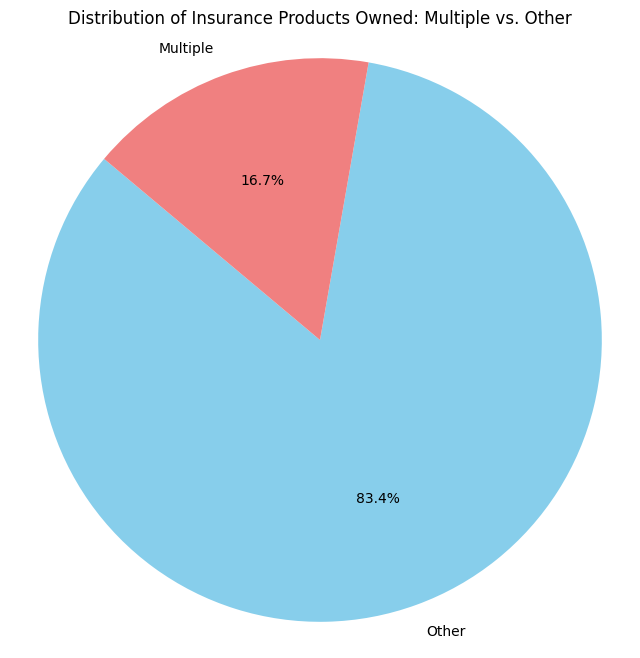

In [75]:

insurance_product_counts = df_encoded_final['Insurance Products Owned'].apply(lambda x: 'Multiple' if x == 'Multiple' else 'Other').value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(insurance_product_counts, labels=insurance_product_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Insurance Products Owned: Multiple vs. Other')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [76]:

df_multiple = df_encoded_final[df_encoded_final['Insurance Products Owned'] == 'Multiple'].copy()
df_other = df_encoded_final[df_encoded_final['Insurance Products Owned'] != 'Multiple'].copy()


In [77]:
df_multiple.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,Deductible_Coverage_Ratio,Days_Since_Renewal,Interactions with Customer Service,Education Level,Income Level,Behavioral Data,Policy Type,Purchase History,Risk Profile,Driving Record,Gender_Female,Gender_Male,Gender_Non-Binary,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Geographic Information_Rural,Geographic Information_Suburban,Geographic Information_Urban,Preferred Communication Channel_App Notification,Preferred Communication Channel_Email,Preferred Communication Channel_Phone,Preferred Communication Channel_SMS,Preferred Contact Time_Afternoon,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language
3,CUST000004,Multiple,0.645051,1.101249,-0.797883,0.819757,0.554996,0.617268,-0.095337,-0.381496,-0.282924,1.063838,0.611621,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,3.0,3.0,0.0,4.0
8,CUST000009,Multiple,0.700886,-1.020520,-1.248114,-0.076114,0.617993,0.911048,0.124710,-0.309034,-0.014527,-0.988976,1.304850,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
12,CUST000013,Multiple,-1.644204,1.081792,-0.095251,-1.149711,-0.566365,0.610160,-0.263752,-0.334820,-0.404790,-0.118658,0.265006,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,2.0,3.0,2.0,2.0,4.0,5.0,0.0
21,CUST000022,Multiple,1.482583,1.413402,-0.877177,-0.301801,0.504597,0.932370,-0.349240,-0.392576,-0.362324,-0.724097,0.265006,2.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,4.0,4.0,0.0,2.0
27,CUST000028,Multiple,-1.588369,1.394827,-0.762038,-1.039288,1.575560,0.581730,0.434154,-0.385432,-0.403301,-1.376835,1.651464,1.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,4.0,5.0,4.0


In [78]:
df_multiple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24975 entries, 3 to 149995
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Customer ID                                       24975 non-null  object 
 1   Insurance Products Owned                          24975 non-null  object 
 2   Age                                               24975 non-null  float64
 3   Coverage Amount                                   24975 non-null  float64
 4   Premium Amount                                    24975 non-null  float64
 5   Deductible                                        24975 non-null  float64
 6   Credit Score                                      24975 non-null  float64
 7   Tenure_Days                                       24975 non-null  float64
 8   Interaction_Rate                                  24975 non-null  float64
 9   Premium_Coverage_Rati

In [79]:
df_multiple.to_excel('df_multiple_fix.xlsx', index=False)

In [80]:
df_other.to_excel('df_other_fix.xlsx', index=False)

## KNN

In [1]:
import pandas as pd
df_knn = pd.read_excel('df_other_fix.xlsx')
df_knn.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,...,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language
0,CUST000001,Life,-0.304153,-0.797124,-0.298176,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,...,0,1,5,1,4,1,5,2,5,3
1,CUST000002,Life,-1.476698,-1.409381,1.682293,-0.489680,0.019515,0.143429,-0.204347,1.375665,...,1,0,5,1,3,2,1,0,1,2
2,CUST000003,Home,0.812557,-0.126935,1.399728,0.422294,-1.158544,1.365933,-0.304023,-0.081476,...,0,1,4,2,3,2,1,1,1,4
3,CUST000005,Health,0.365873,1.433850,0.951071,0.969299,-1.473533,1.318549,-0.013076,-0.285861,...,0,1,6,0,0,0,0,1,1,1
4,CUST000006,Travel,-1.476698,0.672135,-1.659344,-1.543809,0.592794,1.214305,-0.196424,-0.436211,...,1,0,2,1,4,2,0,4,0,1


In [3]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125025 entries, 0 to 125024
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Customer ID                                       125025 non-null  object 
 1   Insurance Products Owned                          125025 non-null  object 
 2   Age                                               125025 non-null  float64
 3   Coverage Amount                                   125025 non-null  float64
 4   Premium Amount                                    125025 non-null  float64
 5   Deductible                                        125025 non-null  float64
 6   Credit Score                                      125025 non-null  float64
 7   Tenure_Days                                       125025 non-null  float64
 8   Interaction_Rate                                  125025 non-null  float64
 9   Prem

In [2]:
X = df_knn.drop(columns=['Customer ID', 'Insurance Products Owned'])


In [7]:
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # 5 tetangga + diri sendiri
knn.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [41]:
joblib.dump(knn, 'knn_fix.pkl')


['knn_fix.pkl']

In [3]:
import joblib
knn_model_path = 'knn_fix.pkl'
knn = joblib.load(knn_model_path)


In [8]:
distances, indices = knn.kneighbors(X)


In [9]:
recommendations = []


In [10]:
# Buat dataframe hasil tetangga
tetangga_data = []

for i, tetangga_idx_list in enumerate(indices):
    cust_id = df_knn.iloc[i]['Customer ID']
    produk_saya = df_knn.iloc[i]['Insurance Products Owned']
    
    # Menghitung Cosine Similarity dari jarak
    cosine_similarity_list = 1 - distances[i][1:]
    
    # Inisialisasi list untuk menyimpan data tetangga dan produk
    tetangga_id_terbaik = []
    cosine_similarity_terbaik = []
    produk_tetangga_terbaik = []  # Menyimpan produk yang dimiliki tetangga

    for rank, t_idx in enumerate(tetangga_idx_list[1:], start=1):  # Skip diri sendiri
        produk_tetangga = df_knn.iloc[t_idx]['Insurance Products Owned']
        tetangga_id = df_knn.iloc[t_idx]['Customer ID']
        cosine_similarity = 1 - distances[i][rank]

        # Jika produk tetangga berbeda dengan produk yang dimiliki pelanggan
        if produk_tetangga != produk_saya:
            tetangga_id_terbaik.append(tetangga_id)
            cosine_similarity_terbaik.append(cosine_similarity)
            produk_tetangga_terbaik.append(produk_tetangga)

    # Memilih produk dari tetangga dengan Cosine Similarity tertinggi
    if cosine_similarity_terbaik:
        idx_max_similarity = cosine_similarity_terbaik.index(max(cosine_similarity_terbaik))
        terbaik_tetangga_id = tetangga_id_terbaik[idx_max_similarity]
        terbaik_cosine_similarity = cosine_similarity_terbaik[idx_max_similarity]
        produk_tetangga_terbaik = produk_tetangga_terbaik[idx_max_similarity]  # Produk dari tetangga dengan similarity tertinggi
    else:
        terbaik_tetangga_id = None
        terbaik_cosine_similarity = None
        produk_tetangga_terbaik = None

    # Menambahkan data ke dalam list
    tetangga_data.append({
        'Customer ID': cust_id,
        'Produk Dimiliki': produk_saya,
        'Produk Rekomendasi': produk_tetangga_terbaik,  # Produk yang dimiliki oleh tetangga terbaik
        'Tetangga ID': terbaik_tetangga_id,  # ID tetangga dengan produk rekomendasi yang terbaik
        'Cosine Similarity': terbaik_cosine_similarity,  # Cosine Similarity terbaik
        'Produk Tetangga': produk_tetangga_terbaik  # Produk yang dimiliki oleh tetangga terbaik
    })

# Membuat dataframe hasil rekomendasi
df_rekomendasi = pd.DataFrame(tetangga_data)
df_rekomendasi.head()


,Customer ID,Produk Dimiliki,Produk Rekomendasi,Tetangga ID,Cosine Similarity,Produk Tetangga
0,CUST000001,Life,Health,CUST101011,0.938001,Health
1,CUST000002,Life,Auto,CUST114235,0.907704,Auto
2,CUST000003,Home,Health,CUST122545,0.914006,Health
3,CUST000005,Health,Home,CUST081865,0.887120,Home
4,CUST000006,Travel,Life,CUST102772,0.875845,Life


In [11]:
df_rekomendasi

,Customer ID,Produk Dimiliki,Produk Rekomendasi,Tetangga ID,Cosine Similarity,Produk Tetangga
0,CUST000001,Life,Health,CUST101011,0.938001,Health
1,CUST000002,Life,Auto,CUST114235,0.907704,Auto
2,CUST000003,Home,Health,CUST122545,0.914006,Health
3,CUST000005,Health,Home,CUST081865,0.887120,Home
4,CUST000006,Travel,Life,CUST102772,0.875845,Life
...,...,...,...,...,...,...
125020,CUST149995,Travel,Home,CUST071508,0.915724,Home
125021,CUST149997,Home,Auto,CUST079565,0.934887,Auto
125022,CUST149998,Home,Health,CUST111330,0.903041,Health
125023,CUST149999,Travel,Life,CUST017546,0.914302,Life


In [4]:
import pandas as pd
df_rekomendasi_knn2= pd.read_excel('df_rekomendasi_knn2.xlsx')

df_rekomendasi_knn2.head()

,Customer ID,Produk Dimiliki,Produk Rekomendasi,Tetangga ID,Cosine Similarity,Produk Tetangga
0,CUST000001,Life,Health,CUST101011,0.938001,Health
1,CUST000002,Life,Auto,CUST114235,0.907704,Auto
2,CUST000003,Home,Health,CUST122545,0.914006,Health
3,CUST000005,Health,Home,CUST081865,0.887120,Home
4,CUST000006,Travel,Life,CUST102772,0.875845,Life


In [ ]:
percentage_below_0_8 = (df_rekomendasi_knn2['Cosine Similarity'] < 0.75).mean() * 100

percentage_below_0_8

0.41351729654069186

In [10]:
result = df_rekomendasi_knn2.groupby('Produk Dimiliki').apply(
    lambda group: (group['Cosine Similarity'] < 0.75).mean() * 100
).reset_index(name='Percentage_Cosine_Similarity_Less_Than_0_8')

# Menampilkan hasil
print(result)

  Produk Dimiliki  Percentage_Cosine_Similarity_Less_Than_0_8
0            Auto                                    0.035801
1          Health                                    0.032127
2            Home                                    0.063439
3            Life                                    0.056297
4          Travel                                    0.016067


C:\Users\Acer\AppData\Local\Temp\ipykernel_14768\3302472463.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_rekomendasi_knn2.groupby('Produk Dimiliki').apply(


In [13]:
# Mencari baris dengan Cosine Similarity tertinggi dan terendah
highest_similarity = df_rekomendasi.loc[df_rekomendasi['Cosine Similarity'].idxmax()]
lowest_similarity = df_rekomendasi.loc[df_rekomendasi['Cosine Similarity'].idxmin()]

# Menampilkan hasilnya
highest_similarity, lowest_similarity


(Customer ID           CUST069042
 Produk Dimiliki           Health
 Produk Rekomendasi          Home
 Tetangga ID           CUST134917
 Cosine Similarity       0.975269
 Produk Tetangga             Home
 Name: 57497, dtype: object,
 Customer ID           CUST071750
 Produk Dimiliki             Life
 Produk Rekomendasi        Travel
 Tetangga ID           CUST006265
 Cosine Similarity       0.651987
 Produk Tetangga           Travel
 Name: 59757, dtype: object)

In [17]:
df_original = pd.read_excel('df_fe_fix.xlsx')

df_original = df_original[df_original['Insurance Products Owned'] != 'Multiple'].reset_index(drop=True)
df_original.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,...,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Type,Premium_Coverage_Ratio
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,Inactive,Frequent,...,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,regional,0.007662
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Unknown,One-time,...,577,Clean,Divorce,A,1161,198,0.008606,0.007659,historic,0.048223
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Occasional,Infrequent,...,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,historic,0.009666
3,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Active,Infrequent,...,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,historic,0.004258
4,CUST000006,22,Male,Widowed,Engineer,Medium,Master,Suburban,Inactive,Infrequent,...,668,Major Violations,Childbirth,E,1613,288,0.008674,0.000292,coastal,0.000279


In [15]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125025 entries, 0 to 125024
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         125025 non-null  object 
 1   Age                                 125025 non-null  int64  
 2   Gender                              125025 non-null  object 
 3   Marital Status                      125025 non-null  object 
 4   Occupation                          125025 non-null  object 
 5   Income Level                        125025 non-null  object 
 6   Education Level                     125025 non-null  object 
 7   Geographic Information              125025 non-null  object 
 8   Behavioral Data                     125025 non-null  object 
 9   Purchase History                    125025 non-null  object 
 10  Claim History                       125025 non-null  object 
 11  Interactions with Customer

## PREDIKSI PREMIUM AMOUNT DARI PRODUK YANG DIREKOMENDASIKAN

In [16]:

df_reg = df_knn.copy()
df_reg['Premium Amount'] = df_reg['Customer ID'].map(df_original.set_index('Customer ID')['Premium Amount'])
df_reg.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,...,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language
0,CUST000001,Life,-0.304153,-0.797124,2122.99,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,...,0,1,5,1,4,1,5,2,5,3
1,CUST000002,Life,-1.476698,-1.409381,4928.58,-0.489680,0.019515,0.143429,-0.204347,1.375665,...,1,0,5,1,3,2,1,0,1,2
2,CUST000003,Home,0.812557,-0.126935,4528.29,0.422294,-1.158544,1.365933,-0.304023,-0.081476,...,0,1,4,2,3,2,1,1,1,4
3,CUST000005,Health,0.365873,1.433850,3892.71,0.969299,-1.473533,1.318549,-0.013076,-0.285861,...,0,1,6,0,0,0,0,1,1,1
4,CUST000006,Travel,-1.476698,0.672135,194.72,-1.543809,0.592794,1.214305,-0.196424,-0.436211,...,1,0,2,1,4,2,0,4,0,1


In [17]:
import os


In [18]:
df_reg = df_reg.merge(
    df_rekomendasi[['Customer ID', 'Produk Rekomendasi']],  # Ambil hanya Customer ID dan Produk Rekomendasi
    on='Customer ID',  # Gabungkan berdasarkan 'Customer ID'
    how='left'  # Gunakan left join agar semua data dari df_reg tetap ada
)

# Tampilkan hasil
df_reg.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,...,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language,Produk Rekomendasi
0,CUST000001,Life,-0.304153,-0.797124,2122.99,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,...,1,5,1,4,1,5,2,5,3,Health
1,CUST000002,Life,-1.476698,-1.409381,4928.58,-0.489680,0.019515,0.143429,-0.204347,1.375665,...,0,5,1,3,2,1,0,1,2,Auto
2,CUST000003,Home,0.812557,-0.126935,4528.29,0.422294,-1.158544,1.365933,-0.304023,-0.081476,...,1,4,2,3,2,1,1,1,4,Health
3,CUST000005,Health,0.365873,1.433850,3892.71,0.969299,-1.473533,1.318549,-0.013076,-0.285861,...,1,6,0,0,0,0,1,1,1,Home
4,CUST000006,Travel,-1.476698,0.672135,194.72,-1.543809,0.592794,1.214305,-0.196424,-0.436211,...,0,2,1,4,2,0,4,0,1,Life


In [19]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125025 entries, 0 to 125024
Data columns (total 46 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Customer ID                                       125025 non-null  object 
 1   Insurance Products Owned                          125025 non-null  object 
 2   Age                                               125025 non-null  float64
 3   Coverage Amount                                   125025 non-null  float64
 4   Premium Amount                                    125025 non-null  float64
 5   Deductible                                        125025 non-null  float64
 6   Credit Score                                      125025 non-null  float64
 7   Tenure_Days                                       125025 non-null  float64
 8   Interaction_Rate                                  125025 non-null  float64
 9   Prem

In [34]:

hasil_evaluasi = []
model_per_produk = {}

# Buat folder model jika belum ada
os.makedirs('models_rf', exist_ok=True)

# Grid diperbesar sedikit
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 25],
    'min_samples_leaf': [2, 3],
    'max_features': ['sqrt', 0.6, 0.7]
}

for produk in df_reg['Produk Rekomendasi'].dropna().unique():
    data_train = df_reg[df_reg['Insurance Products Owned'] == produk]

    if len(data_train) < 100:
        continue

    X = data_train.drop(columns=[
        'Customer ID', 'Insurance Products Owned', 'Premium Amount',
        'Produk Rekomendasi'
    ])
    y = data_train['Premium Amount']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
    search = GridSearchCV(
        base_model,
        param_grid=param_grid,
        cv=2,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train, y_train)

    # Pilih model terbaik dengan R2 <= 0.95 dan MAE terkecil
    best_model = None
    best_score = float('inf')
    best_params = None

    for i in range(len(search.cv_results_['params'])):
        params = search.cv_results_['params'][i]
        temp_model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
        temp_model.fit(X_train, y_train)
        y_pred_temp = temp_model.predict(X_val)
        r2_temp = r2_score(y_val, y_pred_temp)
        mae_temp = mean_absolute_error(y_val, y_pred_temp)

        if r2_temp <= 0.95 and mae_temp < best_score:
            best_score = mae_temp
            best_model = temp_model
            best_params = params

    # Jika tidak ada yang lolos threshold, ambil yang default
    if best_model is None:
        best_model = search.best_estimator_
        best_params = search.best_params_

    # Simpan model ke file
    filename = f'models_rf/model_{produk.replace(" ", "_")}.pkl'
    joblib.dump(best_model, filename)

    model_per_produk[produk] = best_model
    y_pred = best_model.predict(X_val)

    hasil_evaluasi.append({
        'Produk': produk,
        'MAE': mean_absolute_error(y_val, y_pred),
        'RMSE': root_mean_squared_error(y_val, y_pred),
        'R2 Score': r2_score(y_val, y_pred),
        'Train Size': len(X_train),
        'Val Size': len(X_val),
        'Best Params': best_params,
        'Model File': filename
    })

# Hasil evaluasi akhir
df_evaluasi_rf = pd.DataFrame(hasil_evaluasi).sort_values(by='MAE')


In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_evaluasi_rf

,Produk,MAE,RMSE,R2 Score,Train Size,Val Size,Best Params,Model File
4,Travel,495.765258,630.476666,0.803128,19916,4980,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 200}",models_rf/model_Travel.pkl
2,Home,500.903570,646.100266,0.790172,20176,5045,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}",models_rf/model_Home.pkl
0,Health,504.012297,638.569365,0.797008,19920,4981,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}",models_rf/model_Health.pkl
1,Auto,505.558792,644.579521,0.795980,20111,5028,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 150}",models_rf/model_Auto.pkl
3,Life,509.898605,652.977740,0.783328,19894,4974,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 150}",models_rf/model_Life.pkl


In [36]:
print("\n📌 FEATURE IMPORTANCE PER PRODUK:\n")

for produk, model in model_per_produk.items():
    print(f"🔹 Produk: {produk}")
    fitur = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else X_train.columns
    importances = model.feature_importances_
    
    # Gabungkan dan urutkan
    importance_sorted = sorted(zip(fitur, importances), key=lambda x: x[1], reverse=True)
    
    for fitur, score in importance_sorted:
        print(f"   - {fitur:<30}: {score:.4f}")
    
    print("-" * 50)



📌 FEATURE IMPORTANCE PER PRODUK:

🔹 Produk: Health
   - Premium_Coverage_Ratio        : 0.5761
   - Coverage Amount               : 0.0839
   - Deductible_Coverage_Ratio     : 0.0492
   - Deductible                    : 0.0259
   - Tenure_Days                   : 0.0211
   - Days_Since_Renewal            : 0.0205
   - Credit Score                  : 0.0205
   - Interaction_Rate              : 0.0197
   - Age                           : 0.0181
   - Interactions with Customer Service: 0.0136
   - Occupation                    : 0.0106
   - Life Events                   : 0.0093
   - Location_Type                 : 0.0083
   - Previous Claims History       : 0.0083
   - Preferred Language            : 0.0083
   - Segmentation Group            : 0.0082
   - Behavioral Data               : 0.0077
   - Policy Type                   : 0.0071
   - Customer Preferences          : 0.0070
   - Education Level               : 0.0068
   - Income Level                  : 0.0057
   - Purchase Histor

In [20]:
import os
# === Load semua model .pkl ===
folder_path = 'models_rf'
model_per_produk = {}

# Memuat model yang sudah disimpan
for file in os.listdir(folder_path):
    if file.endswith('.pkl'):
        model_name = os.path.splitext(file)[0]  # Nama model sesuai dengan nama produk (misalnya, 'model_Auto')
        model_path = os.path.join(folder_path, file)
        model_per_produk[model_name] = joblib.load(model_path)

print("Model yang berhasil dimuat:", list(model_per_produk.keys()))


Model yang berhasil dimuat: ['model_Auto', 'model_Health', 'model_Home', 'model_Life', 'model_Travel']


In [75]:
df_reg = df_reg.merge(
    df_rekomendasi[['Customer ID', 'Produk Rekomendasi']],
    on='Customer ID',
    how='left'
)
df_reg.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,...,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language,Produk Rekomendasi
0,CUST000001,Life,-0.304153,-0.797124,2122.99,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,...,1,5,1,4,1,5,2,5,3,Travel
1,CUST000001,Life,-0.304153,-0.797124,2122.99,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,...,1,5,1,4,1,5,2,5,3,Travel
2,CUST000002,Life,-1.476698,-1.409381,4928.58,-0.489680,0.019515,0.143429,-0.204347,1.375665,...,0,5,1,3,2,1,0,1,2,Auto
3,CUST000002,Life,-1.476698,-1.409381,4928.58,-0.489680,0.019515,0.143429,-0.204347,1.375665,...,0,5,1,3,2,1,0,1,2,Auto
4,CUST000003,Home,0.812557,-0.126935,4528.29,0.422294,-1.158544,1.365933,-0.304023,-0.081476,...,1,4,2,3,2,1,1,1,4,Auto


In [21]:
df_reg['Rekomendasi_Premi'] = np.nan
drop_cols = [
    'Customer ID', 'Insurance Products Owned', 'Premium Amount',
    'Rekomendasi_Premi', 'Produk Rekomendasi'  # ini WAJIB ditambah
]

# === 5. Prediksi per produk yang direkomendasikan ===
for model_name, model in model_per_produk.items():
    produk = model_name.replace('model_', '')  # dari model_Auto → Auto

    data_target = df_reg[df_reg['Produk Rekomendasi'] == produk]
    
    if len(data_target) == 0:
        continue

    X_target = data_target.drop(columns=[col for col in drop_cols if col in data_target.columns])
    y_pred = model.predict(X_target)
    y_pred = np.maximum(y_pred, 0)

    df_reg.loc[data_target.index, 'Rekomendasi_Premi'] = y_pred


In [22]:
df_reg.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,...,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language,Produk Rekomendasi,Rekomendasi_Premi
0,CUST000001,Life,-0.304153,-0.797124,2122.99,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,...,5,1,4,1,5,2,5,3,Health,2711.731415
1,CUST000002,Life,-1.476698,-1.409381,4928.58,-0.489680,0.019515,0.143429,-0.204347,1.375665,...,5,1,3,2,1,0,1,2,Auto,3297.931296
2,CUST000003,Home,0.812557,-0.126935,4528.29,0.422294,-1.158544,1.365933,-0.304023,-0.081476,...,4,2,3,2,1,1,1,4,Health,3822.957639
3,CUST000005,Health,0.365873,1.433850,3892.71,0.969299,-1.473533,1.318549,-0.013076,-0.285861,...,6,0,0,0,0,1,1,1,Home,3378.384874
4,CUST000006,Travel,-1.476698,0.672135,194.72,-1.543809,0.592794,1.214305,-0.196424,-0.436211,...,2,1,4,2,0,4,0,1,Life,1025.104034


In [23]:
df_rekomendasi.head()

,Customer ID,Produk Dimiliki,Produk Rekomendasi,Tetangga ID,Cosine Similarity,Produk Tetangga
0,CUST000001,Life,Health,CUST101011,0.938001,Health
1,CUST000002,Life,Auto,CUST114235,0.907704,Auto
2,CUST000003,Home,Health,CUST122545,0.914006,Health
3,CUST000005,Health,Home,CUST081865,0.887120,Home
4,CUST000006,Travel,Life,CUST102772,0.875845,Life


In [40]:
# Menggabungkan df_rekomendasi dengan df_reg berdasarkan Customer ID untuk mendapatkan Premium Amount dan Rekomendasi_Premi untuk Customer ID
df_rekomendasi_dgn_premi = df_rekomendasi.merge(df_reg[['Customer ID', 'Premium Amount', 'Rekomendasi_Premi']], 
                                      on='Customer ID', 
                                      how='left', 
                                      suffixes=('_cust', '_rekomendasi'))

# Menggabungkan df_rekomendasi dengan df_reg berdasarkan Tetangga ID untuk mendapatkan Premium Amount untuk Tetangga ID
df_rekomendasi_dgn_premi = df_rekomendasi_dgn_premi.merge(df_reg[['Customer ID', 'Premium Amount']], 
                                      left_on='Tetangga ID', 
                                      right_on='Customer ID', 
                                      how='left', 
                                      suffixes=('_cust', '_tetangga'))

# Menampilkan hasil gabungan
df_rekomendasi_dgn_premi.head()

,Customer ID_cust,Produk Dimiliki,Produk Rekomendasi,Tetangga ID,Cosine Similarity,Produk Tetangga,Premium Amount_cust,Rekomendasi_Premi,Customer ID_tetangga,Premium Amount_tetangga
0,CUST000001,Life,Health,CUST101011,0.938001,Health,2122.99,2711.731415,CUST101011,1529.77
1,CUST000002,Life,Auto,CUST114235,0.907704,Auto,4928.58,3297.931296,CUST114235,3948.52
2,CUST000003,Home,Health,CUST122545,0.914006,Health,4528.29,3822.957639,CUST122545,2955.15
3,CUST000005,Health,Home,CUST081865,0.887120,Home,3892.71,3378.384874,CUST081865,2830.68
4,CUST000006,Travel,Life,CUST102772,0.875845,Life,194.72,1025.104034,CUST102772,1804.80


In [41]:
df_rekomendasi_dgn_premi.rename(columns={
    'Customer ID_cust': 'Customer ID',
    'Premium Amount_cust': 'Premium Amount',
    'Premium Amount_tetangga': 'Premium Amount Tetangga',
    'Rekomendasi_Premi':'Premium Amount Produk Rekomendasi'
}, inplace=True)

df_rekomendasi_dgn_premi

,Customer ID,Produk Dimiliki,Produk Rekomendasi,Tetangga ID,Cosine Similarity,Produk Tetangga,Premium Amount,Premium Amount Produk Rekomendasi,Customer ID_tetangga,Premium Amount Tetangga
0,CUST000001,Life,Health,CUST101011,0.938001,Health,2122.99,2711.731415,CUST101011,1529.77
1,CUST000002,Life,Auto,CUST114235,0.907704,Auto,4928.58,3297.931296,CUST114235,3948.52
2,CUST000003,Home,Health,CUST122545,0.914006,Health,4528.29,3822.957639,CUST122545,2955.15
3,CUST000005,Health,Home,CUST081865,0.887120,Home,3892.71,3378.384874,CUST081865,2830.68
4,CUST000006,Travel,Life,CUST102772,0.875845,Life,194.72,1025.104034,CUST102772,1804.80
...,...,...,...,...,...,...,...,...,...,...
125020,CUST149995,Travel,Home,CUST071508,0.915724,Home,707.06,1443.264180,CUST071508,260.62
125021,CUST149997,Home,Auto,CUST079565,0.934887,Auto,1093.55,1312.399960,CUST079565,1972.85
125022,CUST149998,Home,Health,CUST111330,0.903041,Health,4999.39,3788.642279,CUST111330,4268.05
125023,CUST149999,Travel,Life,CUST017546,0.914302,Life,3759.32,3380.716459,CUST017546,2539.13


In [42]:
df_rekomendasi_dgn_premi = df_rekomendasi_dgn_premi[[
    'Customer ID', 
    'Produk Dimiliki', 
    'Produk Rekomendasi',
    'Premium Amount Produk Rekomendasi', 
    'Cosine Similarity', 
    'Tetangga ID', 
    'Produk Tetangga', 
    'Premium Amount Tetangga'
]]


df_rekomendasi_dgn_premi

,Customer ID,Produk Dimiliki,Produk Rekomendasi,Premium Amount Produk Rekomendasi,Cosine Similarity,Tetangga ID,Produk Tetangga,Premium Amount Tetangga
0,CUST000001,Life,Health,2711.731415,0.938001,CUST101011,Health,1529.77
1,CUST000002,Life,Auto,3297.931296,0.907704,CUST114235,Auto,3948.52
2,CUST000003,Home,Health,3822.957639,0.914006,CUST122545,Health,2955.15
3,CUST000005,Health,Home,3378.384874,0.887120,CUST081865,Home,2830.68
4,CUST000006,Travel,Life,1025.104034,0.875845,CUST102772,Life,1804.80
...,...,...,...,...,...,...,...,...
125020,CUST149995,Travel,Home,1443.264180,0.915724,CUST071508,Home,260.62
125021,CUST149997,Home,Auto,1312.399960,0.934887,CUST079565,Auto,1972.85
125022,CUST149998,Home,Health,3788.642279,0.903041,CUST111330,Health,4268.05
125023,CUST149999,Travel,Life,3380.716459,0.914302,CUST017546,Life,2539.13


In [44]:
df_rekomendasi_dgn_premi.to_excel('df_rekomendasi_dgn_premi.xlsx', index=False)


In [45]:
df_rekomendasi_dgn_premi

,Customer ID,Produk Dimiliki,Produk Rekomendasi,Premium Amount Produk Rekomendasi,Cosine Similarity,Tetangga ID,Produk Tetangga,Premium Amount Tetangga
0,CUST000001,Life,Health,2711.731415,0.938001,CUST101011,Health,1529.77
1,CUST000002,Life,Auto,3297.931296,0.907704,CUST114235,Auto,3948.52
2,CUST000003,Home,Health,3822.957639,0.914006,CUST122545,Health,2955.15
3,CUST000005,Health,Home,3378.384874,0.887120,CUST081865,Home,2830.68
4,CUST000006,Travel,Life,1025.104034,0.875845,CUST102772,Life,1804.80
...,...,...,...,...,...,...,...,...
125020,CUST149995,Travel,Home,1443.264180,0.915724,CUST071508,Home,260.62
125021,CUST149997,Home,Auto,1312.399960,0.934887,CUST079565,Auto,1972.85
125022,CUST149998,Home,Health,3788.642279,0.903041,CUST111330,Health,4268.05
125023,CUST149999,Travel,Life,3380.716459,0.914302,CUST017546,Life,2539.13


## ANALISIS KESALAHAN

In [12]:
df_rekomendasi_dgn_premi = pd.read_excel('df_rekomendasi_dgn_premi.xlsx')
df_filtered = df_rekomendasi_dgn_premi[df_rekomendasi_dgn_premi['Cosine Similarity'] < 0.75]
df_filtered.head()

,Customer ID,Produk Dimiliki,Produk Rekomendasi,Premium Amount Produk Rekomendasi,Cosine Similarity,Tetangga ID,Produk Tetangga,Premium Amount Tetangga
4292,CUST005178,Home,Health,1018.588648,0.734474,CUST136743,Health,714.67
4657,CUST005607,Life,Home,2745.092218,0.722035,CUST118949,Home,3497.16
12282,CUST014756,Health,Travel,2767.702200,0.739039,CUST022763,Travel,2214.41
14774,CUST017682,Health,Life,2013.358947,0.740052,CUST003852,Life,2246.78
16609,CUST019898,Life,Travel,3047.944550,0.733743,CUST117371,Travel,4569.16


In [13]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 4292 to 122075
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        51 non-null     object 
 1   Produk Dimiliki                    51 non-null     object 
 2   Produk Rekomendasi                 51 non-null     object 
 3   Premium Amount Produk Rekomendasi  51 non-null     float64
 4   Cosine Similarity                  51 non-null     float64
 5   Tetangga ID                        51 non-null     object 
 6   Produk Tetangga                    51 non-null     object 
 7   Premium Amount Tetangga            51 non-null     float64
dtypes: float64(3), object(5)
memory usage: 3.6+ KB


In [15]:
# Mengambil satu customer acak untuk setiap Produk Rekomendasi
df_analisis = df_filtered.groupby('Produk Rekomendasi').sample(n=1, random_state=100)

# Menampilkan hasil
df_analisis


,Customer ID,Produk Dimiliki,Produk Rekomendasi,Premium Amount Produk Rekomendasi,Cosine Similarity,Tetangga ID,Produk Tetangga,Premium Amount Tetangga
51973,CUST062436,Home,Auto,2786.532407,0.704020,CUST066652,Auto,4993.82
4292,CUST005178,Home,Health,1018.588648,0.734474,CUST136743,Health,714.67
55283,CUST066384,Health,Home,2184.931245,0.709934,CUST144672,Home,774.51
109108,CUST130905,Travel,Life,2997.421980,0.737275,CUST022229,Life,1729.28
82825,CUST099388,Auto,Travel,3602.014535,0.745549,CUST072582,Travel,4777.89


In [18]:
# Memilih kolom yang diperlukan dari df_analisis
df_analisis_selected = df_analisis[['Customer ID', 'Produk Rekomendasi', 'Premium Amount Produk Rekomendasi', 'Cosine Similarity']]

# Memilih kolom yang diperlukan dari df_original
df_original_selected = df_original[['Customer ID', 'Age', 'Coverage Amount', 'Income Level', 
                                    'Risk Profile', 'Claim History', 'Customer Preferences', 
                                    'Segmentation Group', 'Premium_Coverage_Ratio', 
                                    'Deductible_Coverage_Ratio']]

# Menggabungkan kedua DataFrame berdasarkan Customer ID
df_customer = pd.merge(df_analisis_selected, df_original_selected, on='Customer ID', how='inner')
df_customer

,Customer ID,Produk Rekomendasi,Premium Amount Produk Rekomendasi,Cosine Similarity,Age,Coverage Amount,Income Level,Risk Profile,Claim History,Customer Preferences,Segmentation Group,Premium_Coverage_Ratio,Deductible_Coverage_Ratio
0,CUST062436,Auto,2786.532407,0.704020,30,59182,Medium,Medium,1-2 Claims,Comprehensive Coverage,B,0.068529,0.007749
1,CUST005178,Health,1018.588648,0.734474,73,877246,High,Low,1-2 Claims,Eco-Friendly,A,0.000333,0.002246
2,CUST066384,Home,2184.931245,0.709934,18,33022,High,Low,1-2 Claims,Comprehensive Coverage,A,0.013616,0.016579
3,CUST130905,Life,2997.421980,0.737275,73,165887,High,Medium,3+ Claims,Comprehensive Coverage,B,0.010552,0.001970
4,CUST099388,Travel,3602.014535,0.745549,33,636766,High,Low,1-2 Claims,Comprehensive Coverage,C,0.006101,0.002189


In [19]:
# Memilih kolom yang diperlukan dari df_analisis
df_analisis_selected = df_analisis[['Tetangga ID', 'Produk Tetangga', 'Premium Amount Tetangga']]

# Memilih kolom yang diperlukan dari df_original
df_original_selected = df_original[['Customer ID', 'Age', 'Coverage Amount', 'Income Level', 
                                    'Risk Profile', 'Claim History', 'Customer Preferences', 
                                    'Segmentation Group', 'Premium_Coverage_Ratio', 
                                    'Deductible_Coverage_Ratio']]

# Menggabungkan kedua DataFrame berdasarkan Customer ID = Tetangga ID
df_tetangga = pd.merge(df_analisis_selected, df_original_selected, left_on='Tetangga ID', right_on='Customer ID', how='inner')

# Mengganti nama kolom 'Customer ID' menjadi 'Tetangga ID'
df_tetangga = df_tetangga.drop(columns=['Customer ID'])
df_tetangga

,Tetangga ID,Produk Tetangga,Premium Amount Tetangga,Age,Coverage Amount,Income Level,Risk Profile,Claim History,Customer Preferences,Segmentation Group,Premium_Coverage_Ratio,Deductible_Coverage_Ratio
0,CUST066652,Auto,4993.82,33,145898,Medium,Low,3+ Claims,Comprehensive Coverage,B,0.034228,0.006108
1,CUST136743,Health,714.67,72,976803,Medium,Medium,No Claims,Low Cost,A,0.000732,0.001936
2,CUST144672,Home,774.51,24,103564,Low,Low,3+ Claims,Comprehensive Coverage,A,0.007478,0.011868
3,CUST022229,Life,1729.28,63,455880,High,Low,No Claims,Comprehensive Coverage,B,0.003793,0.000524
4,CUST072582,Travel,4777.89,23,769519,Medium,Low,No Claims,Eco-Friendly,D,0.006209,0.002093


In [23]:
# Data customer_tetangga_pairs yang sudah ada
customer_tetangga_pairs = df_analisis[['Customer ID', 'Tetangga ID']].drop_duplicates()

# Menggabungkan df_customer dan df_tetangga berdasarkan pasangan Customer ID dan Tetangga ID
df_match = pd.merge(customer_tetangga_pairs, df_customer, on='Customer ID', how='left')
df_match = pd.merge(df_match, df_tetangga, on='Tetangga ID', how='left', suffixes=('_cust', '_neigh'))

# Menyusun ulang kolom agar Tetangga ID ada sebelum Produk Tetangga
cols_order = ['Customer ID', 'Produk Rekomendasi', 'Premium Amount Produk Rekomendasi', 
              'Age_cust', 'Coverage Amount_cust', 'Income Level_cust', 'Risk Profile_cust', 
              'Claim History_cust', 'Customer Preferences_cust', 'Segmentation Group_cust', 
              'Premium_Coverage_Ratio_cust', 'Deductible_Coverage_Ratio_cust', 'Cosine Similarity','Tetangga ID', 'Produk Tetangga', 'Premium Amount Tetangga', 'Age_neigh', 
              'Coverage Amount_neigh', 'Income Level_neigh', 'Risk Profile_neigh', 'Claim History_neigh',
              'Customer Preferences_neigh', 'Segmentation Group_neigh', 'Premium_Coverage_Ratio_neigh', 
              'Deductible_Coverage_Ratio_neigh']

df_match = df_match[cols_order]
df_match

,Customer ID,Produk Rekomendasi,Premium Amount Produk Rekomendasi,Age_cust,Coverage Amount_cust,Income Level_cust,Risk Profile_cust,Claim History_cust,Customer Preferences_cust,Segmentation Group_cust,...,Premium Amount Tetangga,Age_neigh,Coverage Amount_neigh,Income Level_neigh,Risk Profile_neigh,Claim History_neigh,Customer Preferences_neigh,Segmentation Group_neigh,Premium_Coverage_Ratio_neigh,Deductible_Coverage_Ratio_neigh
0,CUST062436,Auto,2786.532407,30,59182,Medium,Medium,1-2 Claims,Comprehensive Coverage,B,...,4993.82,33,145898,Medium,Low,3+ Claims,Comprehensive Coverage,B,0.034228,0.006108
1,CUST005178,Health,1018.588648,73,877246,High,Low,1-2 Claims,Eco-Friendly,A,...,714.67,72,976803,Medium,Medium,No Claims,Low Cost,A,0.000732,0.001936
2,CUST066384,Home,2184.931245,18,33022,High,Low,1-2 Claims,Comprehensive Coverage,A,...,774.51,24,103564,Low,Low,3+ Claims,Comprehensive Coverage,A,0.007478,0.011868
3,CUST130905,Life,2997.421980,73,165887,High,Medium,3+ Claims,Comprehensive Coverage,B,...,1729.28,63,455880,High,Low,No Claims,Comprehensive Coverage,B,0.003793,0.000524
4,CUST099388,Travel,3602.014535,33,636766,High,Low,1-2 Claims,Comprehensive Coverage,C,...,4777.89,23,769519,Medium,Low,No Claims,Eco-Friendly,D,0.006209,0.002093


In [24]:
def calculate_match_score(row):
    match_score = 0

    # Memeriksa masing-masing kriteria
    if abs(row['Age_cust'] - row['Age_neigh']) <= 5:
        match_score += 1
    if abs(row['Coverage Amount_cust'] - row['Coverage Amount_neigh']) <= 20000:
        match_score += 1
    if abs(row['Premium Amount Produk Rekomendasi'] - row['Premium Amount Tetangga']) <= 10000:
        match_score += 1
    if row['Income Level_cust'] == row['Income Level_neigh']:
        match_score += 1
    if row['Risk Profile_cust'] == row['Risk Profile_neigh']:
        match_score += 1
    if row['Claim History_cust'] == row['Claim History_neigh']:
        match_score += 1
    if row['Customer Preferences_cust'] == row['Customer Preferences_neigh']:
        match_score += 1
    if row['Segmentation Group_cust'] == row['Segmentation Group_neigh']:
        match_score += 1
    if abs(row['Premium_Coverage_Ratio_cust'] - row['Premium_Coverage_Ratio_neigh']) <= 0.05:
        match_score += 1
    if abs(row['Deductible_Coverage_Ratio_cust'] - row['Deductible_Coverage_Ratio_neigh']) <= 0.05:
        match_score += 1

    # Mengembalikan match score yang dinormalisasi (jumlah memenuhi/10)
    return match_score / 10

# Terapkan fungsi untuk menghitung match score pada setiap baris df_match
df_match['Match Score'] = df_match.apply(calculate_match_score, axis=1)

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_match

,Customer ID,Produk Rekomendasi,Premium Amount Produk Rekomendasi,Age_cust,Coverage Amount_cust,Income Level_cust,Risk Profile_cust,Claim History_cust,Customer Preferences_cust,Segmentation Group_cust,Premium_Coverage_Ratio_cust,Deductible_Coverage_Ratio_cust,Cosine Similarity,Tetangga ID,Produk Tetangga,Premium Amount Tetangga,Age_neigh,Coverage Amount_neigh,Income Level_neigh,Risk Profile_neigh,Claim History_neigh,Customer Preferences_neigh,Segmentation Group_neigh,Premium_Coverage_Ratio_neigh,Deductible_Coverage_Ratio_neigh,Match Score
0,CUST062436,Auto,2786.532407,30,59182,Medium,Medium,1-2 Claims,Comprehensive Coverage,B,0.068529,0.007749,0.704020,CUST066652,Auto,4993.82,33,145898,Medium,Low,3+ Claims,Comprehensive Coverage,B,0.034228,0.006108,0.7
1,CUST005178,Health,1018.588648,73,877246,High,Low,1-2 Claims,Eco-Friendly,A,0.000333,0.002246,0.734474,CUST136743,Health,714.67,72,976803,Medium,Medium,No Claims,Low Cost,A,0.000732,0.001936,0.5
2,CUST066384,Home,2184.931245,18,33022,High,Low,1-2 Claims,Comprehensive Coverage,A,0.013616,0.016579,0.709934,CUST144672,Home,774.51,24,103564,Low,Low,3+ Claims,Comprehensive Coverage,A,0.007478,0.011868,0.6
3,CUST130905,Life,2997.421980,73,165887,High,Medium,3+ Claims,Comprehensive Coverage,B,0.010552,0.001970,0.737275,CUST022229,Life,1729.28,63,455880,High,Low,No Claims,Comprehensive Coverage,B,0.003793,0.000524,0.6
4,CUST099388,Travel,3602.014535,33,636766,High,Low,1-2 Claims,Comprehensive Coverage,C,0.006101,0.002189,0.745549,CUST072582,Travel,4777.89,23,769519,Medium,Low,No Claims,Eco-Friendly,D,0.006209,0.002093,0.4


In [26]:
df_match.to_excel('df_match_with_scores.xlsx', index=False)

## EDA

## EDA DATA AWAL

In [100]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125025 entries, 0 to 125024
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         125025 non-null  object 
 1   Age                                 125025 non-null  int64  
 2   Gender                              125025 non-null  object 
 3   Marital Status                      125025 non-null  object 
 4   Occupation                          125025 non-null  object 
 5   Income Level                        125025 non-null  object 
 6   Education Level                     125025 non-null  object 
 7   Geographic Information              125025 non-null  object 
 8   Behavioral Data                     125025 non-null  object 
 9   Purchase History                    125025 non-null  object 
 10  Claim History                       125025 non-null  object 
 11  Interactions with Customer

C:\Users\Acer\AppData\Local\Temp\ipykernel_28360\4196344530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_original, ax=ax, palette='viridis')
C:\Users\Acer\AppData\Local\Temp\ipykernel_28360\4196344530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_original, ax=ax, palette='viridis')
C:\Users\Acer\AppData\Local\Temp\ipykernel_28360\4196344530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_original, ax=ax, palette='viridis')
C:\Users\Acer\AppData\Local\Temp\ipykern

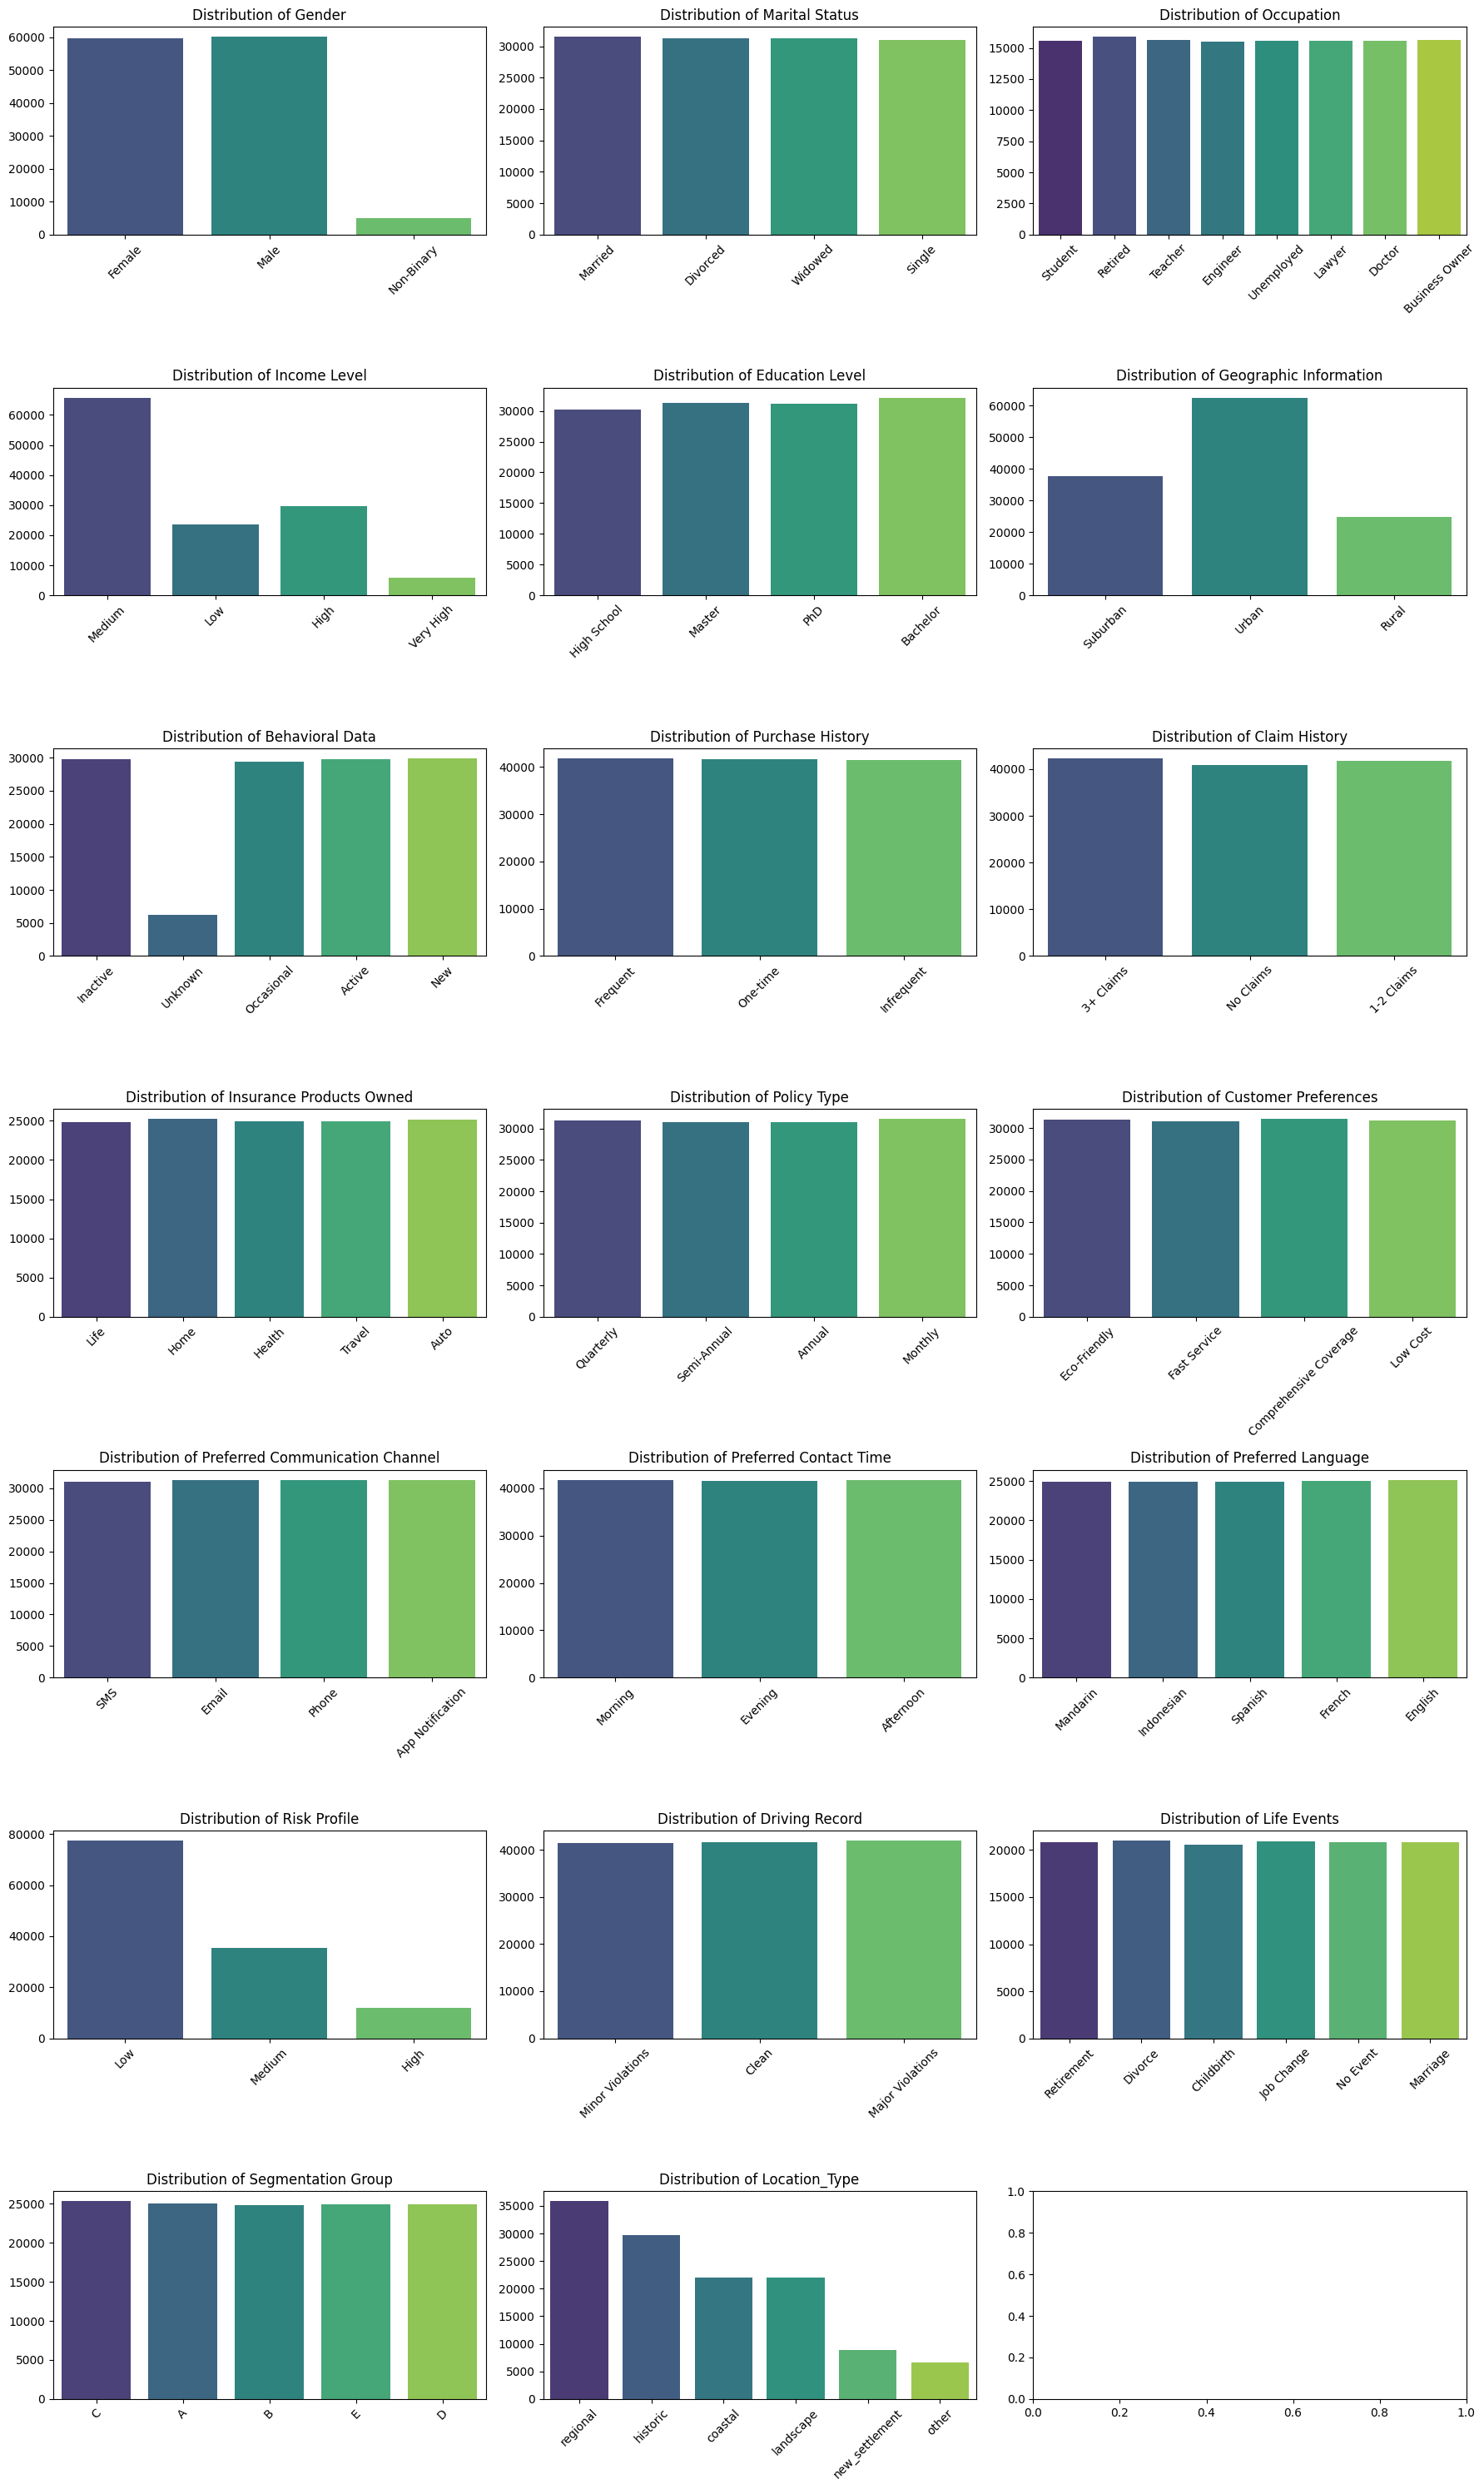

In [157]:
# Menyiapkan visualisasi untuk kolom dengan jenis data 'object' kecuali 'Customer ID'
object_columns = df_original.select_dtypes(include='object').columns.tolist()
object_columns.remove('Customer ID')

# Membuat subplots untuk visualisasi dalam bentuk 7 x 3
fig, axes = plt.subplots(7, 3, figsize=(18, 30))

# Melakukan iterasi untuk setiap kolom dan visualisasikan menggunakan countplot
for i, column in enumerate(object_columns):
    ax = axes[i // 3, i % 3]  # Menentukan posisi subplot
    sns.countplot(x=column, data=df_original, ax=ax, palette='viridis')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Menyesuaikan layout dan menampilkan hasil
plt.tight_layout()
plt.show()

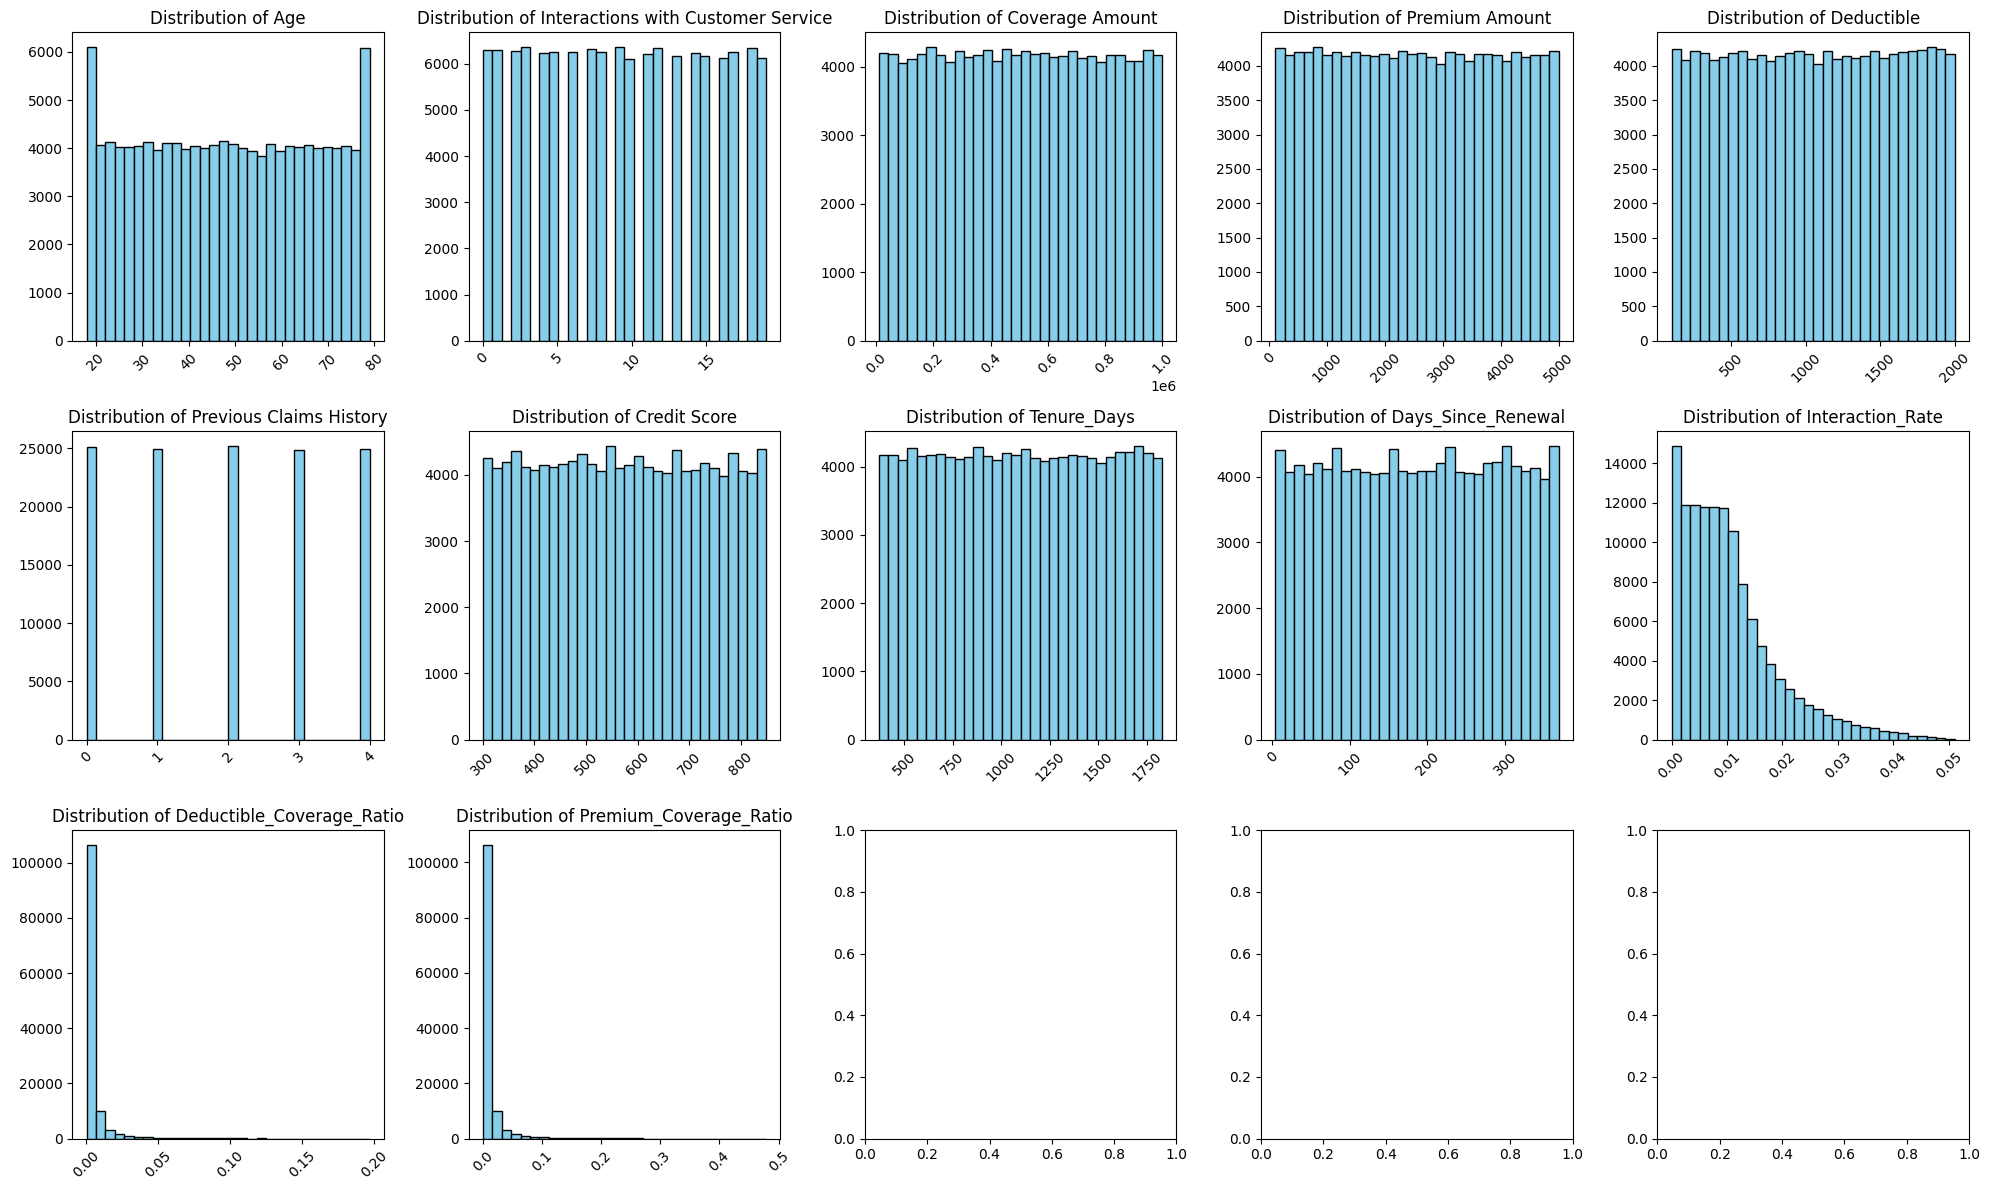

In [158]:
# Menyiapkan kolom yang memiliki jenis data float dan int
numeric_columns = df_original.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Membuat subplots untuk visualisasi dalam bentuk 3 x 5 histogram
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

# Melakukan iterasi untuk setiap kolom dan visualisasikan menggunakan histogram
for i, column in enumerate(numeric_columns):
    ax = axes[i // 5, i % 5]  # Menentukan posisi subplot
    ax.hist(df_original[column], bins=30, edgecolor='black', color='skyblue')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Menyesuaikan layout dan menampilkan hasil
plt.tight_layout()
plt.show()

In [117]:
df_rekomendasi_dgn_premi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125025 entries, 0 to 125024
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        125025 non-null  object 
 1   Produk Dimiliki                    125025 non-null  object 
 2   Produk Rekomendasi                 124984 non-null  object 
 3   Premium Amount Produk Rekomendasi  124984 non-null  float64
 4   Cosine Similarity                  124984 non-null  float64
 5   Tetangga ID                        124984 non-null  object 
 6   Produk Tetangga                    124984 non-null  object 
 7   Premium Amount Tetangga            124984 non-null  float64
dtypes: float64(3), object(5)
memory usage: 7.6+ MB


In [127]:
final_data = pd.merge(df_original, df_rekomendasi_dgn_premi[['Customer ID', 'Produk Rekomendasi', 
                                                             'Premium Amount Produk Rekomendasi', 
                                                             'Cosine Similarity', 'Tetangga ID']], 
                       on='Customer ID', how='left')

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125025 entries, 0 to 125024
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         125025 non-null  object 
 1   Age                                 125025 non-null  int64  
 2   Gender                              125025 non-null  object 
 3   Marital Status                      125025 non-null  object 
 4   Occupation                          125025 non-null  object 
 5   Income Level                        125025 non-null  object 
 6   Education Level                     125025 non-null  object 
 7   Geographic Information              125025 non-null  object 
 8   Behavioral Data                     125025 non-null  object 
 9   Purchase History                    125025 non-null  object 
 10  Claim History                       125025 non-null  object 
 11  Interactions with Customer

In [128]:
final_data.to_excel('final_data.xlsx', index=False)


In [129]:
final_data['Produk Rekomendasi'].value_counts()

Produk Rekomendasi
Health    25086
Travel    25074
Home      25058
Life      24888
Auto      24878
Name: count, dtype: int64

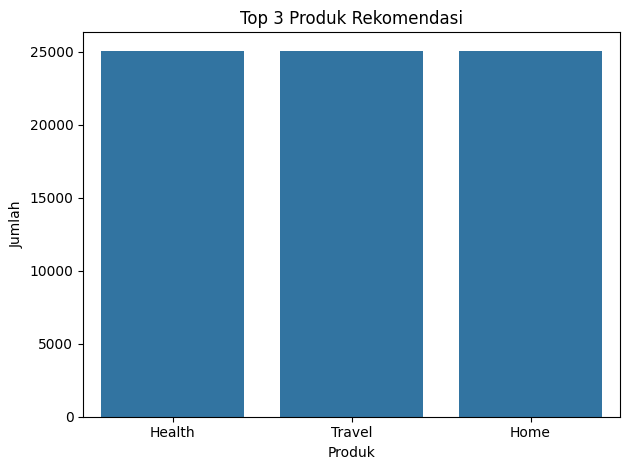

In [130]:
top3 = final_data['Produk Rekomendasi'].value_counts().head(3)

# Plot
sns.barplot(x=top3.index, y=top3.values)
plt.title('Top 3 Produk Rekomendasi')
plt.xlabel('Produk')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

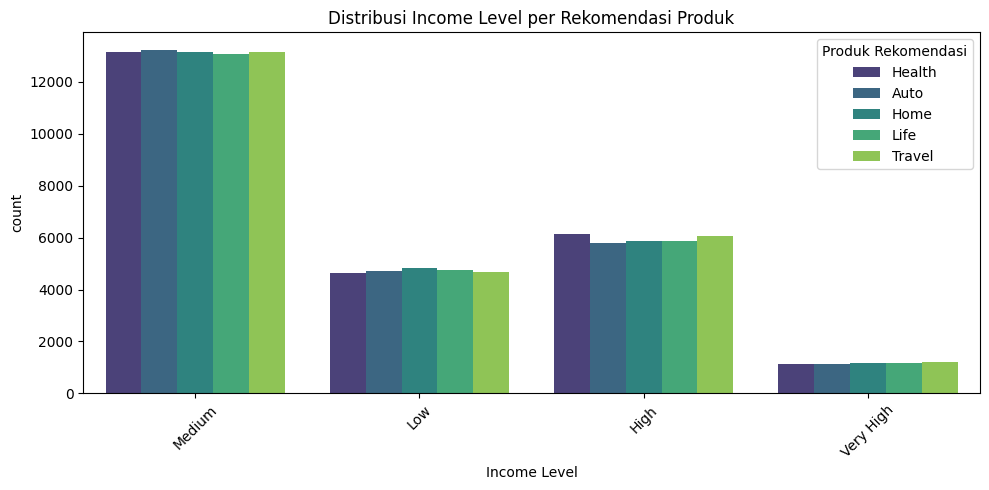

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=final_data, x='Income Level', hue='Produk Rekomendasi', palette='viridis')
plt.xlabel('Income Level')
plt.title('Distribusi Income Level per Rekomendasi Produk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_28360\2751923172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_age.values, y=mean_age.index, palette='viridis')


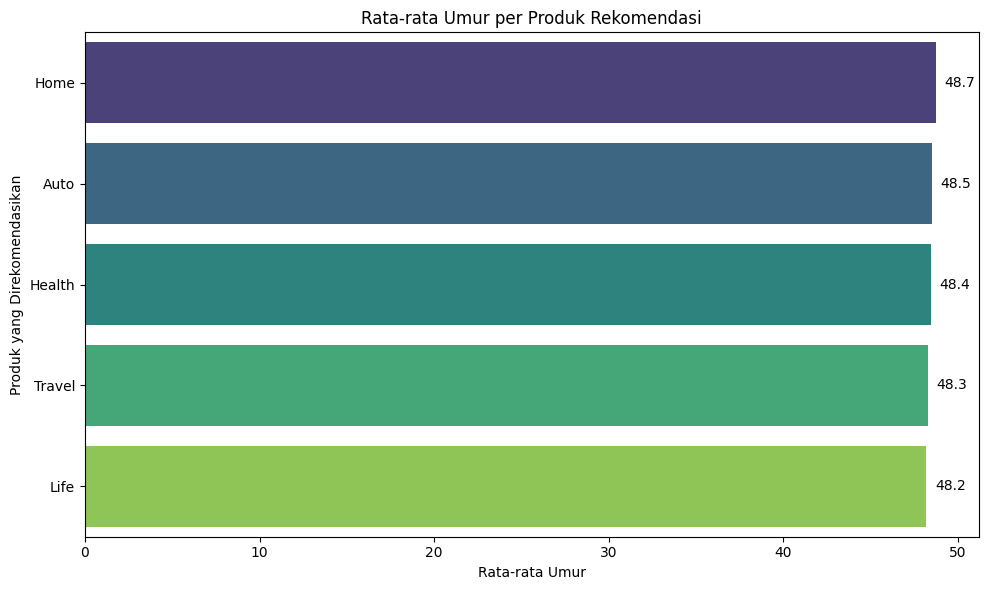

In [132]:
mean_age = final_data.groupby('Produk Rekomendasi')['Age'].mean().sort_values(ascending=False)

# Plot bar chart horizontal
plt.figure(figsize=(10,6))
ax = sns.barplot(x=mean_age.values, y=mean_age.index, palette='viridis')

# Tambahkan label angka di ujung bar
for i, v in enumerate(mean_age.values):
    plt.text(v + 0.5, i, f"{v:.1f}", color='black', va='center')

plt.title('Rata-rata Umur per Produk Rekomendasi')
plt.xlabel('Rata-rata Umur')
plt.ylabel('Produk yang Direkomendasikan')
plt.tight_layout()
plt.show()

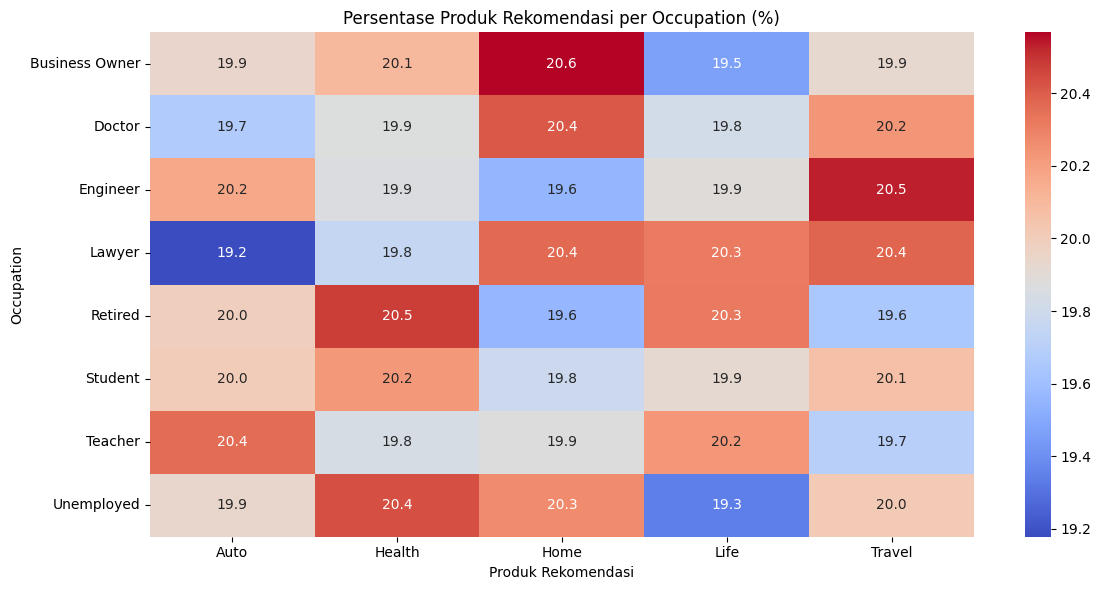

In [133]:
crosstab_occ = pd.crosstab(final_data['Occupation'], final_data['Produk Rekomendasi'], normalize='index') * 100

plt.figure(figsize=(12,6))
sns.heatmap(crosstab_occ, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Persentase Produk Rekomendasi per Occupation (%)')
plt.xlabel('Produk Rekomendasi')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


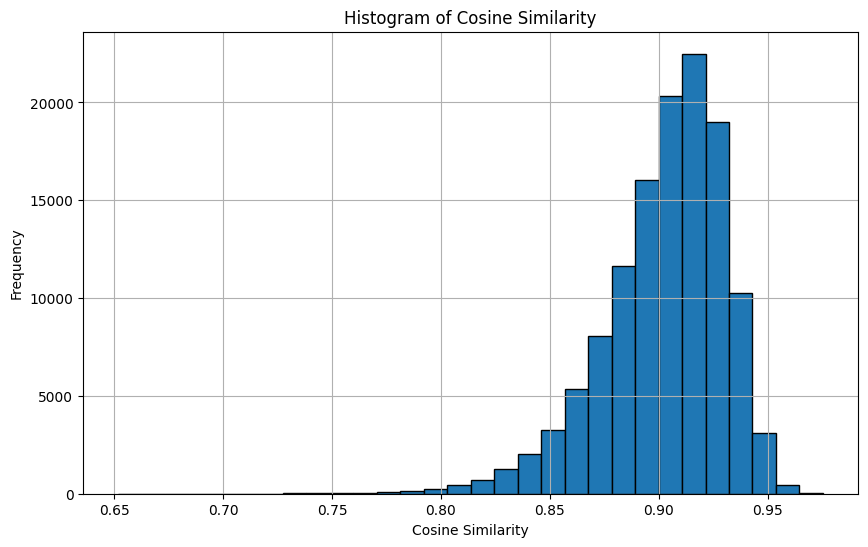

In [134]:
import matplotlib.pyplot as plt

# Menampilkan histogram Cosine Similarity dari final_data
plt.figure(figsize=(10,6))
plt.hist(final_data['Cosine Similarity'], bins=30, edgecolor='black')
plt.title('Histogram of Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


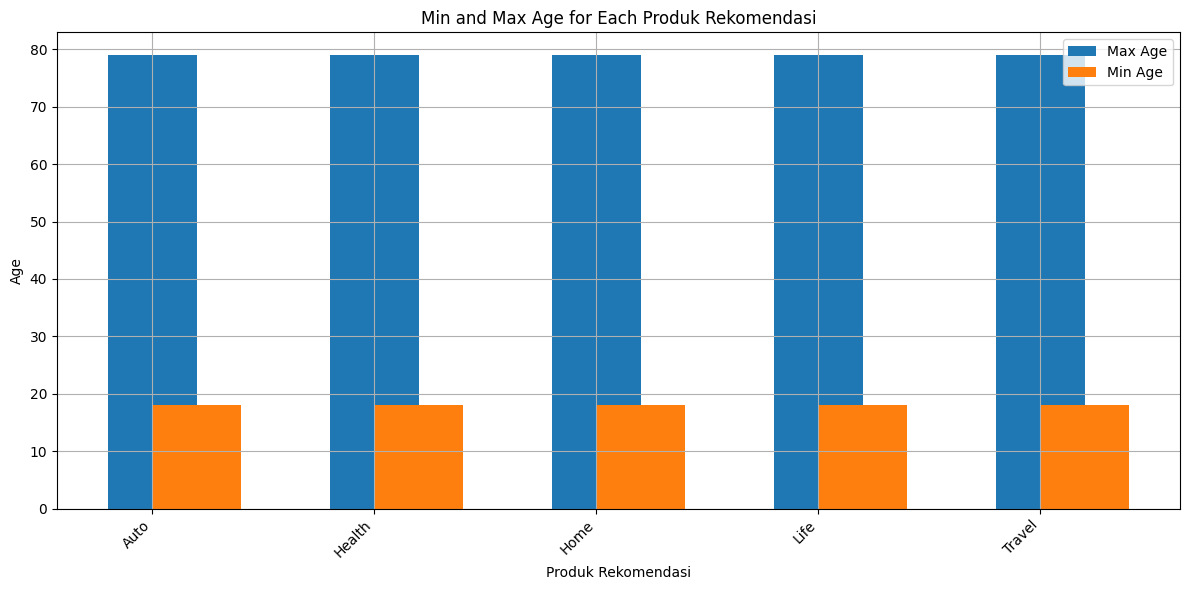

In [135]:
# Menghitung umur maksimal dan minimal untuk setiap Produk Rekomendasi di final_data
age_summary = final_data.groupby('Produk Rekomendasi')['Age'].agg(['min', 'max']).reset_index()

# Visualisasi menggunakan bar plot
plt.figure(figsize=(12,6))
plt.bar(age_summary['Produk Rekomendasi'], age_summary['max'], width=0.4, label='Max Age', align='center')
plt.bar(age_summary['Produk Rekomendasi'], age_summary['min'], width=0.4, label='Min Age', align='edge')

plt.title('Min and Max Age for Each Produk Rekomendasi')
plt.xlabel('Produk Rekomendasi')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()


C:\Users\Acer\AppData\Local\Temp\ipykernel_28360\1201320894.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_data['Premium Amount Produk Rekomendasi'], label='Premium Amount Produk Rekomendasi', shade=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_28360\1201320894.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_data['Premium Amount'], label='Premium Amount', shade=True)


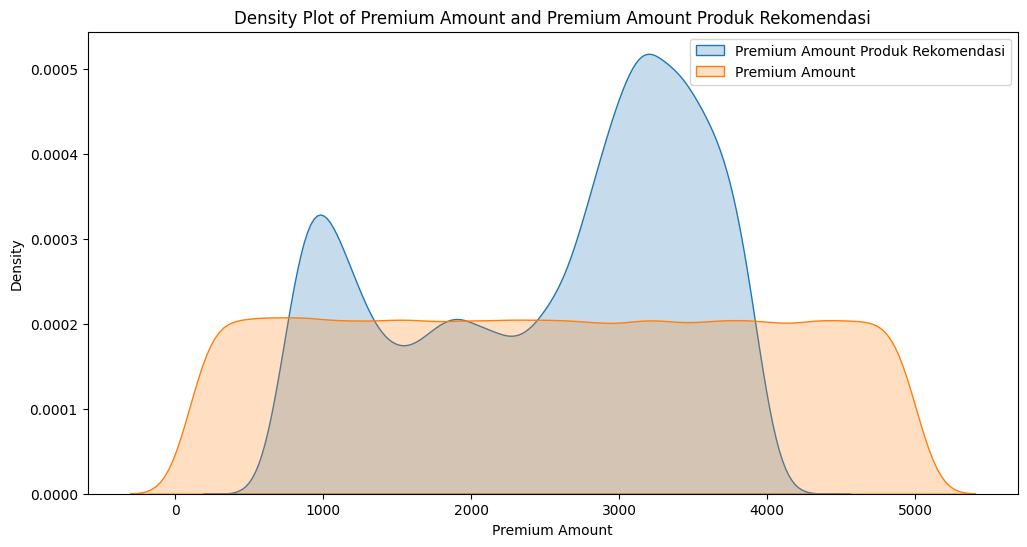

In [137]:
import seaborn as sns

# Visualisasi density plot untuk Premium Amount Produk Rekomendasi dan Premium Amount dalam satu plot
plt.figure(figsize=(12,6))

# Plot untuk Premium Amount Produk Rekomendasi
sns.kdeplot(final_data['Premium Amount Produk Rekomendasi'], label='Premium Amount Produk Rekomendasi', shade=True)

# Plot untuk Premium Amount
sns.kdeplot(final_data['Premium Amount'], label='Premium Amount', shade=True)

# Menambahkan title dan label
plt.title('Density Plot of Premium Amount and Premium Amount Produk Rekomendasi')
plt.xlabel('Premium Amount')
plt.ylabel('Density')
plt.legend()

plt.show()

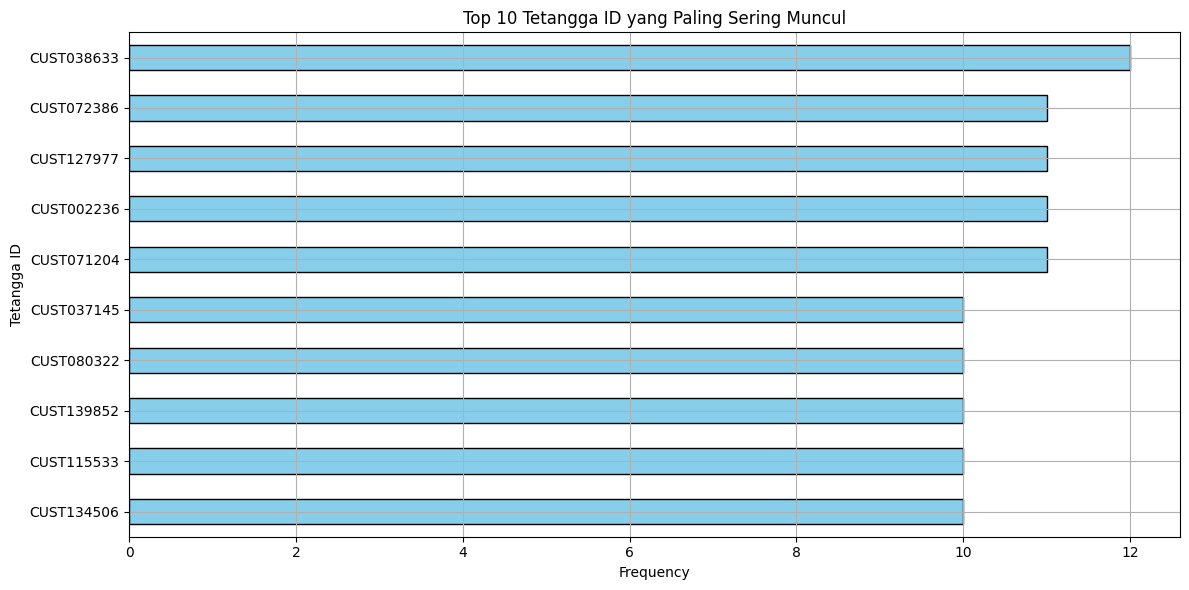

In [140]:

# Visualisasi Top 10 Tetangga ID yang paling sering muncul menggunakan horizontal bar plot
plt.figure(figsize=(12,6))
top_tetangga = final_data['Tetangga ID'].value_counts().head(10).sort_values(ascending=True)
top_tetangga.plot(kind='barh', color='skyblue', edgecolor='black')

# Menambahkan title dan label
plt.title('Top 10 Tetangga ID yang Paling Sering Muncul')
plt.xlabel('Frequency')
plt.ylabel('Tetangga ID')
plt.grid(True)
plt.tight_layout()

plt.show()

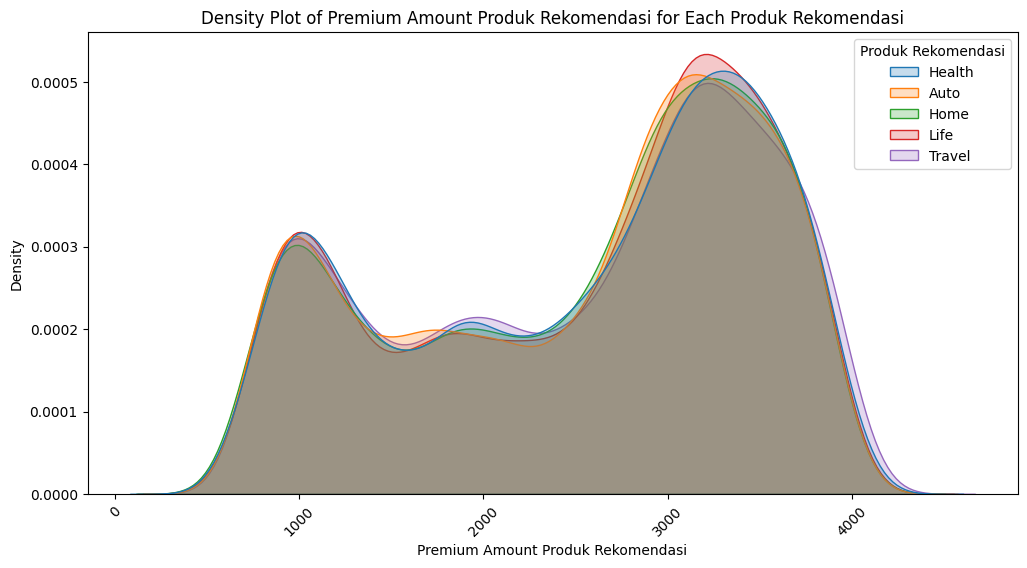

In [149]:
# Visualisasi Density Plot untuk Premium Amount Produk Rekomendasi berdasarkan Produk Rekomendasi
plt.figure(figsize=(12,6))
sns.kdeplot(data=final_data, x='Premium Amount Produk Rekomendasi', hue='Produk Rekomendasi', fill=True, common_norm=False)

# Menambahkan title dan label
plt.title('Density Plot of Premium Amount Produk Rekomendasi for Each Produk Rekomendasi')
plt.xlabel('Premium Amount Produk Rekomendasi')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

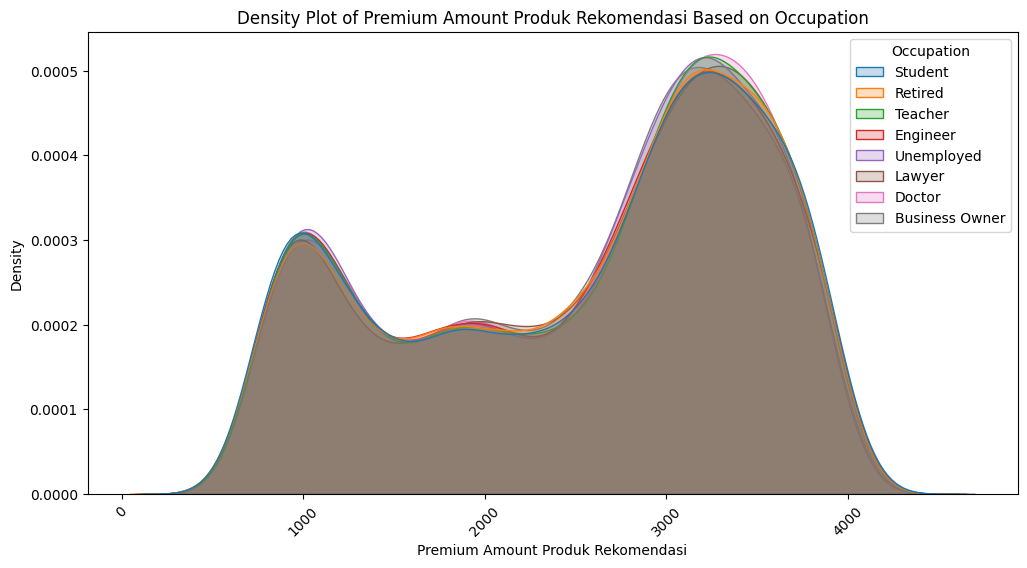

In [150]:

# Visualisasi Density Plot untuk Premium Amount Produk Rekomendasi berdasarkan Occupation
plt.figure(figsize=(12,6))
sns.kdeplot(data=final_data, x='Premium Amount Produk Rekomendasi', hue='Occupation', fill=True, common_norm=False)

# Menambahkan title dan label
plt.title('Density Plot of Premium Amount Produk Rekomendasi Based on Occupation')
plt.xlabel('Premium Amount Produk Rekomendasi')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()